# Part 1: Importing and Combining Timeseries Datasets

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
#uncomment if using the outdated dataset

# #create a for loop that reads all sheets from the excel file and updates the column headers
# x = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# for i in x:
#     globals()[f"platts{i}"] = pd.read_excel('Platts Historical.xlsx', sheet_name=f"{i}")
#     globals()[f"platts{i}"].columns = globals()[f"platts{i}"].iloc[0]
#     globals()[f"platts{i}"] = globals()[f"platts{i}"].iloc[2:]
#     globals()[f"platts{i}"].reset_index(inplace=True, drop=True)



In [ ]:
# #contenate all of the created dataframes into one big dataframe
# df_comp = pd.concat([platts2009, platts2010, platts2011, platts2012, platts2013, platts2014, platts2015, platts2016, platts2017, platts2018, platts2019, platts2020, platts2021], ignore_index=True, axis=0)
# df_comp.head()

In [ ]:
# df_comp = df_comp.rename(columns={np.nan: 'Date'})
# df_comp.head()

In [ ]:
# #save the one big dataframe into a csv file for checkpoint and later calling
# df_comp.to_csv('mergedplatts.csv', index = False)

In [ ]:
#uncomment if using the outdated dataset

# df = pd.read_csv('mergedplatts.csv')
# df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df  = pd.read_excel("/content/drive/My Drive/Decisions Data Dump/Platts/Petroleum Data.xlsx")

In [ ]:
df1 = df.copy()

In [ ]:
df.head()

Date  Diesel  Gasoline  Jet Fuel
0 2010-10-01  0.5928    0.5377    0.5837
1 2010-10-04  0.5949    0.5416    0.5876
2 2010-10-05  0.5961    0.5438    0.5891
3 2010-10-06  0.6049    0.5512    0.5986
4 2010-10-07  0.6085    0.5595    0.6026

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

df['year']= df['Date'].apply(lambda x: x.year)
df['quarter']= df['Date'].apply(lambda x: x.quarter)
df['month']= df['Date'].apply(lambda x: x.month)
df['day']= df['Date'].apply(lambda x: x.day)

In [ ]:
df.head()

Date  Diesel  Gasoline  Jet Fuel  year  quarter  month  day
0 2010-10-01  0.5928    0.5377    0.5837  2010        4     10    1
1 2010-10-04  0.5949    0.5416    0.5876  2010        4     10    4
2 2010-10-05  0.5961    0.5438    0.5891  2010        4     10    5
3 2010-10-06  0.6049    0.5512    0.5986  2010        4     10    6
4 2010-10-07  0.6085    0.5595    0.6026  2010        4     10    7

In [ ]:
df= df.reset_index(drop=True)
df['weekday']= df.apply(lambda row: row['Date'].weekday(), axis=1)
df['weekday']= (df['weekday']<5).astype(int) #to capture weekdays
print(df.shape)
print(df.Date.min())
print(df.Date.max())
df.tail(5)

(3006, 9)
2010-10-01 00:00:00
2022-10-03 00:00:00


Date  Diesel  Gasoline  Jet Fuel  year  quarter  month  day  \
3001 2022-09-27  0.7338    0.5447    0.6829  2022        3      9   27   
3002 2022-09-28  0.7438    0.5535    0.6894  2022        3      9   28   
3003 2022-09-29  0.7769    0.5644    0.7294  2022        3      9   29   
3004 2022-09-30  0.7548    0.5678    0.7065  2022        3      9   30   
3005 2022-10-03  0.7786    0.5598    0.7178  2022        4     10    3   

      weekday  
3001        1  
3002        1  
3003        1  
3004        1  
3005        1

In [ ]:
print('The time series starts from: ', df.Date.min())
print('The time series ends on: ', df.Date.max())

The time series starts from:  2010-10-01 00:00:00
The time series ends on:  2022-10-03 00:00:00


# Part 2: EDA

In [ ]:
# gasoline = df[["Date","PGAEY00", "year", "quarter", "month", "day"]].dropna().rename(columns={"PGAEY00": "Price"})
# print(gasoline.shape)
# gasoline.tail()

In [ ]:
# diesel = df[["Date", "AAPPF00", "year", "quarter", "month", "day"]].dropna().rename(columns={"AAPPF00": "Price"})
# print(diesel.shape)
# diesel.head()

### Plot

In [ ]:
# g1=gasoline.loc[:,['Date','Price']]
# g1.set_index('Date', inplace=True)
# d1=diesel.loc[:,['Date','Price']]
# d1.set_index('Date', inplace=True)

In [ ]:
df.set_index('Date', inplace=True)

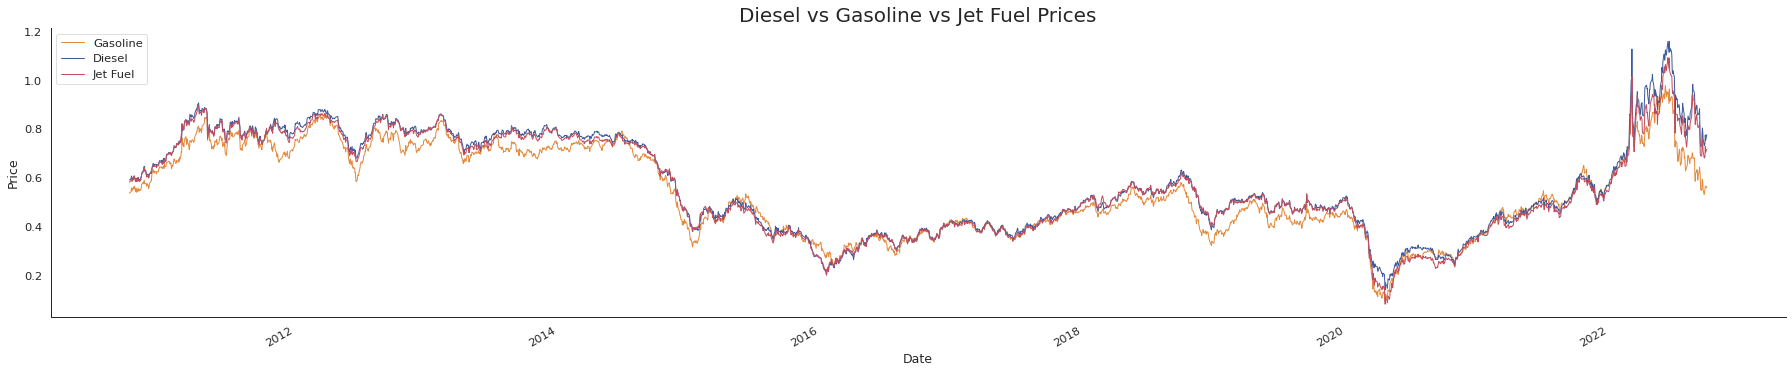

In [ ]:
df.Gasoline.plot(figsize = (25,5), label='Gasoline', color='#e58a3d',  linewidth=1)
df.Diesel.plot(figsize = (25,5), label='Diesel', color='#3f5b9c',  linewidth=1)
df['Jet Fuel'].plot(figsize = (25,5), label='Jet Fuel', color='#c24e5d',  linewidth=1)
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.title('Diesel vs Gasoline vs Jet Fuel Prices', size=20)
sns.despine(top=True)
plt.show();



### Boxplot of yearly vs quarterly Price

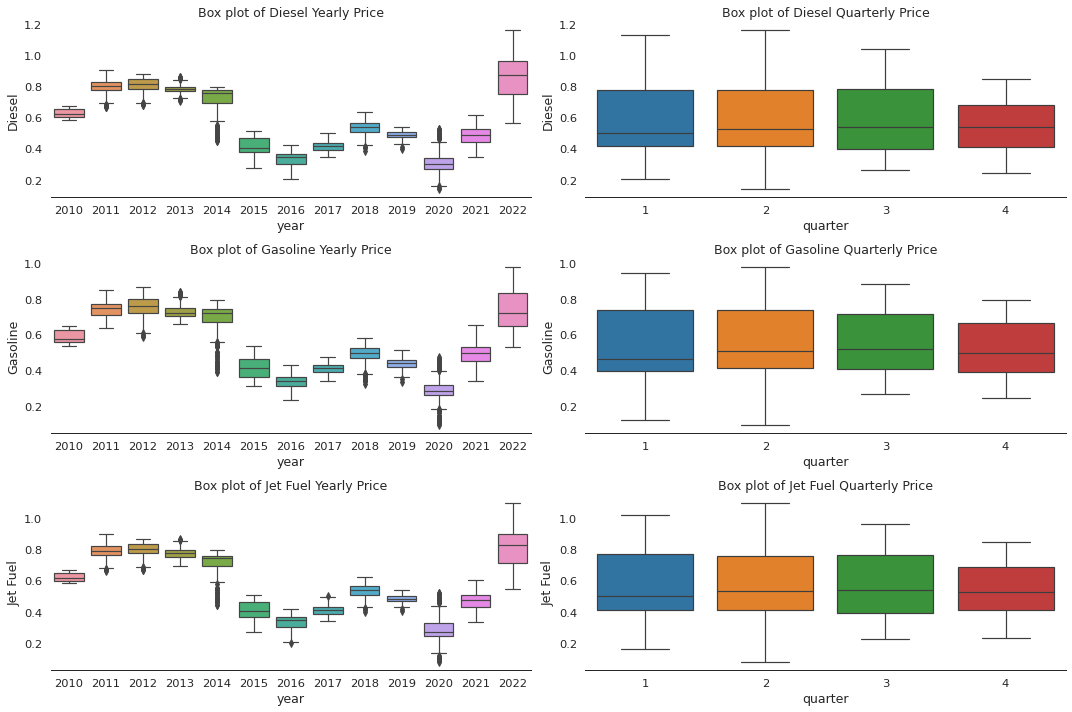

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='year', y='Diesel', data=df)
plt.xlabel('year')
plt.title('Box plot of Diesel Yearly Price')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(3,2,2)
sns.boxplot(x='quarter', y='Diesel', data=df)
plt.xlabel('quarter')
plt.title('Box plot of Diesel Quarterly Price')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(3,2,3)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='year', y='Gasoline', data=df)
plt.xlabel('year')
plt.title('Box plot of Gasoline Yearly Price')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(3,2,4)
sns.boxplot(x='quarter', y='Gasoline', data=df)
plt.xlabel('quarter')
plt.title('Box plot of Gasoline Quarterly Price')
sns.despine(left=True)
plt.tight_layout();

plt.subplot(3,2,5)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='year', y='Jet Fuel', data=df)
plt.xlabel('year')
plt.title('Box plot of Jet Fuel Yearly Price')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(3,2,6)
sns.boxplot(x='quarter', y='Jet Fuel', data=df)
plt.xlabel('quarter')
plt.title('Box plot of Jet Fuel Quarterly Price')
sns.despine(left=True)
plt.tight_layout();



### Price distribution (QQ Plot)

count   3006.0000
mean       0.5634
std        0.1961
min        0.0821
25%        0.4059
50%        0.5143
75%        0.7612
max        1.0945
Name: Jet Fuel, dtype: float64

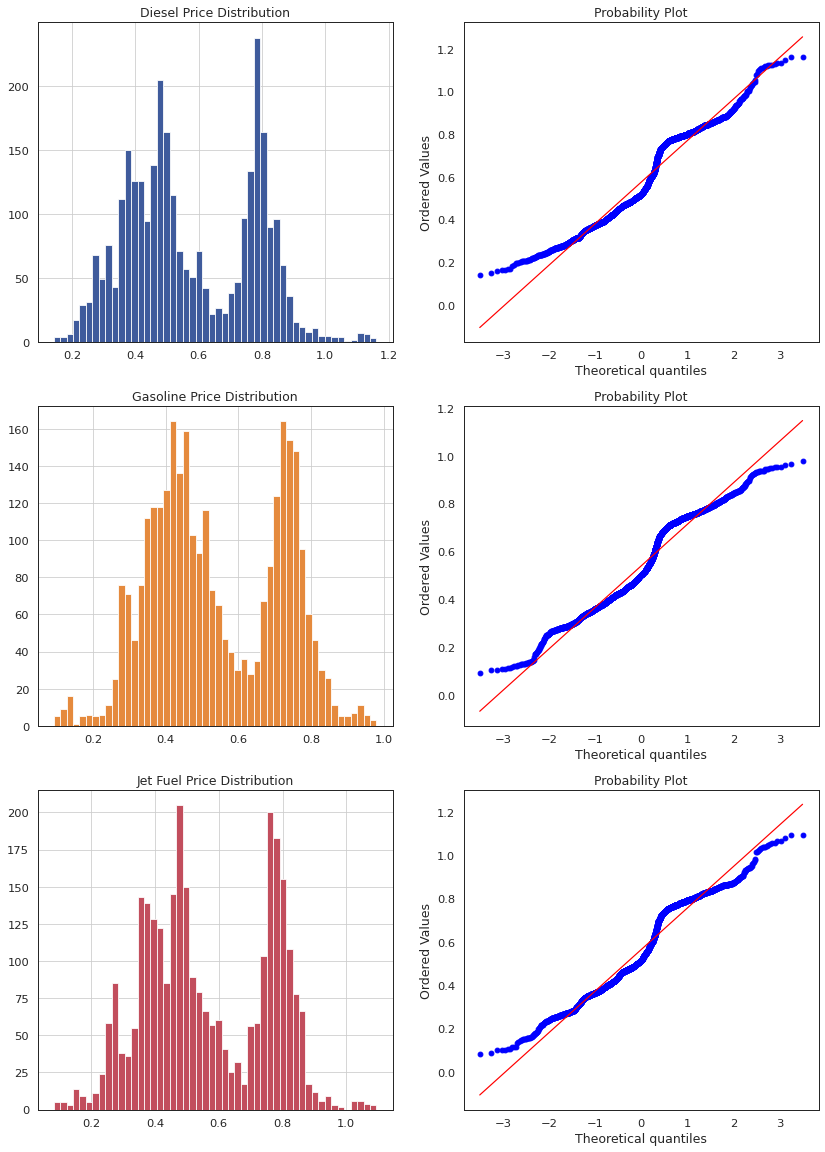

In [ ]:
plt.figure(figsize=(14,20))
plt.subplot(3,2,1)
plt.subplots_adjust(wspace=0.2)
df.Diesel.hist(bins=50, color='#3f5b9c')
plt.title('Diesel Price Distribution')

plt.subplot(3,2,2)
stats.probplot(df.Diesel, plot=plt)
df.Diesel.describe().T

plt.subplot(3,2,3)
plt.subplots_adjust(wspace=0.2)
df.Gasoline.hist(bins=50, color='#e58a3d')
plt.title('Gasoline Price Distribution')

plt.subplot(3,2,4)
stats.probplot(df.Gasoline, plot=plt)
df.Gasoline.describe().T

plt.subplot(3,2,5)
plt.subplots_adjust(wspace=0.2)
df['Jet Fuel'].hist(bins=50, color='#c24e5d')
plt.title('Jet Fuel Price Distribution')

plt.subplot(3,2,6)
stats.probplot(df['Jet Fuel'], plot=plt)
df['Jet Fuel'].describe().T

### Resampling

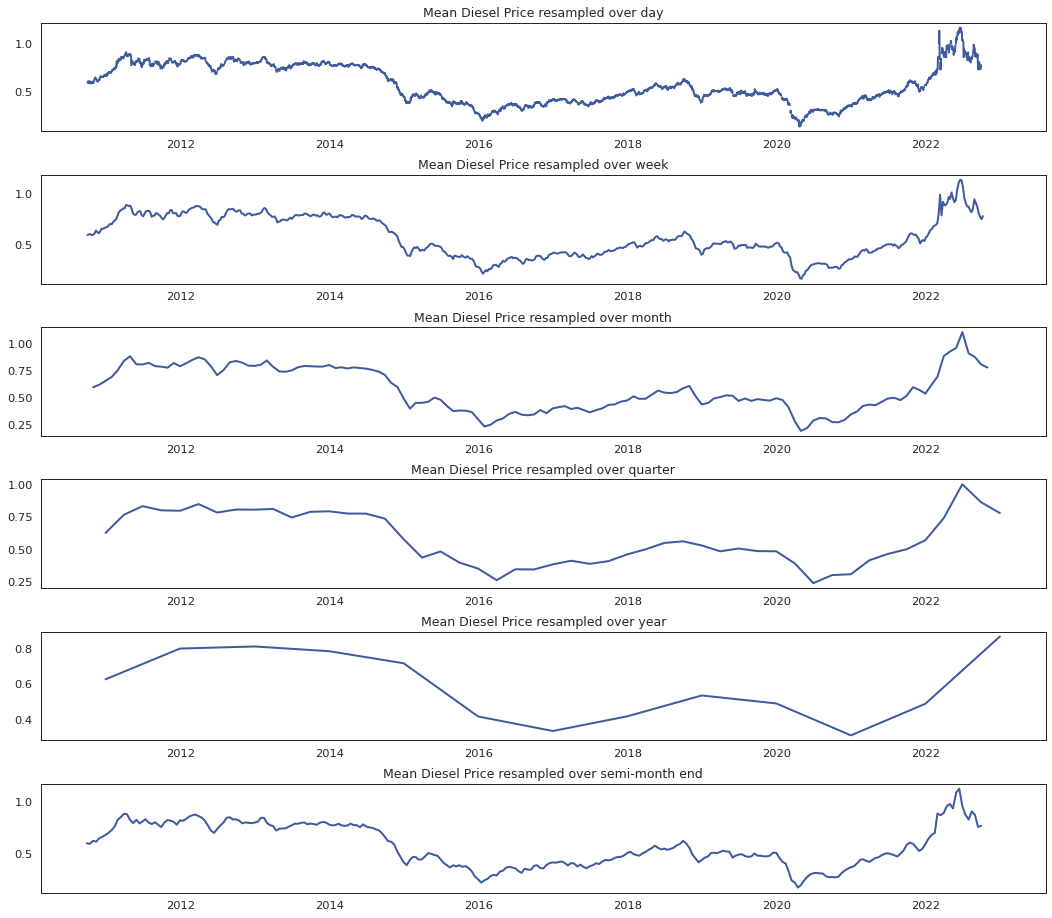

In [ ]:
fig= plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1= fig.add_subplot(6,1,1)
ax1.plot(df.Diesel.resample('D').mean(), linewidth=2, color='#3f5b9c')
ax1.set_title('Mean Diesel Price resampled over day')

ax2= fig.add_subplot(6,1,2, sharex=ax1)
ax2.plot(df.Diesel.resample('W').mean(), linewidth=2, color='#3f5b9c')
ax2.set_title('Mean Diesel Price resampled over week')
ax2.tick_params(axis='both', which='major')

ax3= fig.add_subplot(6,1,3, sharex=ax1)
ax3.plot(df.Diesel.resample('M').mean(), linewidth=2, color='#3f5b9c')
ax3.set_title('Mean Diesel Price resampled over month')
ax3.tick_params(axis='both', which='major')

ax4= fig.add_subplot(6,1,4, sharex=ax1)
ax4.plot(df.Diesel.resample('Q').mean(), linewidth=2, color='#3f5b9c')
ax4.set_title('Mean Diesel Price resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5= fig.add_subplot(6,1,5, sharex=ax1)
ax5.plot(df.Diesel.resample('A').mean(), linewidth=2, color='#3f5b9c')
ax5.set_title('Mean Diesel Price resampled over year')
ax5.tick_params(axis='both', which='major')

ax6= fig.add_subplot(6,1,6, sharex=ax1)
ax6.plot(df.Diesel.resample('SM').mean(), linewidth=2, color='#3f5b9c')
ax6.set_title('Mean Diesel Price resampled over semi-month end')
ax6.tick_params(axis='both', which='major')

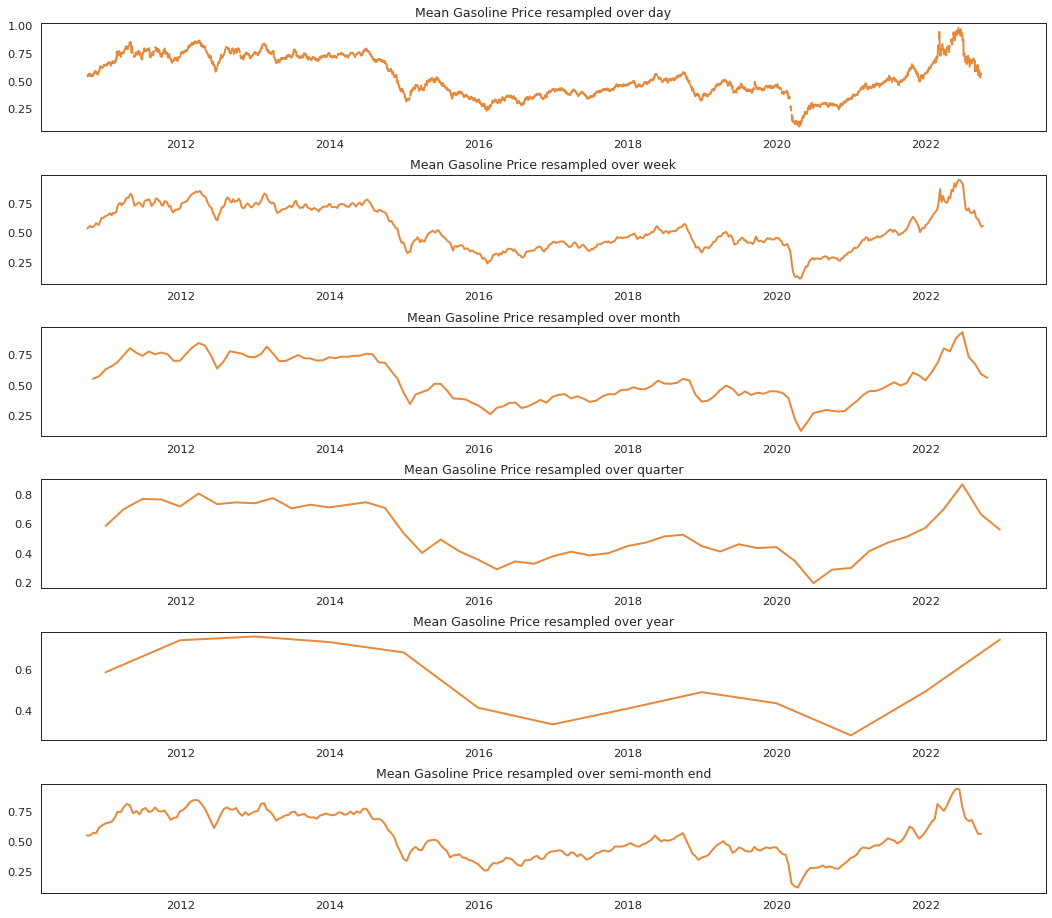

In [ ]:
fig= plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1= fig.add_subplot(6,1,1)
ax1.plot(df.Gasoline.resample('D').mean(), linewidth=2, color='#e58a3d')
ax1.set_title('Mean Gasoline Price resampled over day')

ax2= fig.add_subplot(6,1,2, sharex=ax1)
ax2.plot(df.Gasoline.resample('W').mean(), linewidth=2, color='#e58a3d')
ax2.set_title('Mean Gasoline Price resampled over week')
ax2.tick_params(axis='both', which='major')

ax3= fig.add_subplot(6,1,3, sharex=ax1)
ax3.plot(df.Gasoline.resample('M').mean(), linewidth=2, color='#e58a3d')
ax3.set_title('Mean Gasoline Price resampled over month')
ax3.tick_params(axis='both', which='major')

ax4= fig.add_subplot(6,1,4, sharex=ax1)
ax4.plot(df.Gasoline.resample('Q').mean(), linewidth=2, color='#e58a3d')
ax4.set_title('Mean Gasoline Price resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5= fig.add_subplot(6,1,5, sharex=ax1)
ax5.plot(df.Gasoline.resample('A').mean(), linewidth=2, color='#e58a3d')
ax5.set_title('Mean Gasoline Price resampled over year')
ax5.tick_params(axis='both', which='major')

ax6= fig.add_subplot(6,1,6, sharex=ax1)
ax6.plot(df.Gasoline.resample('SM').mean(), linewidth=2, color='#e58a3d')
ax6.set_title('Mean Gasoline Price resampled over semi-month end')
ax6.tick_params(axis='both', which='major')


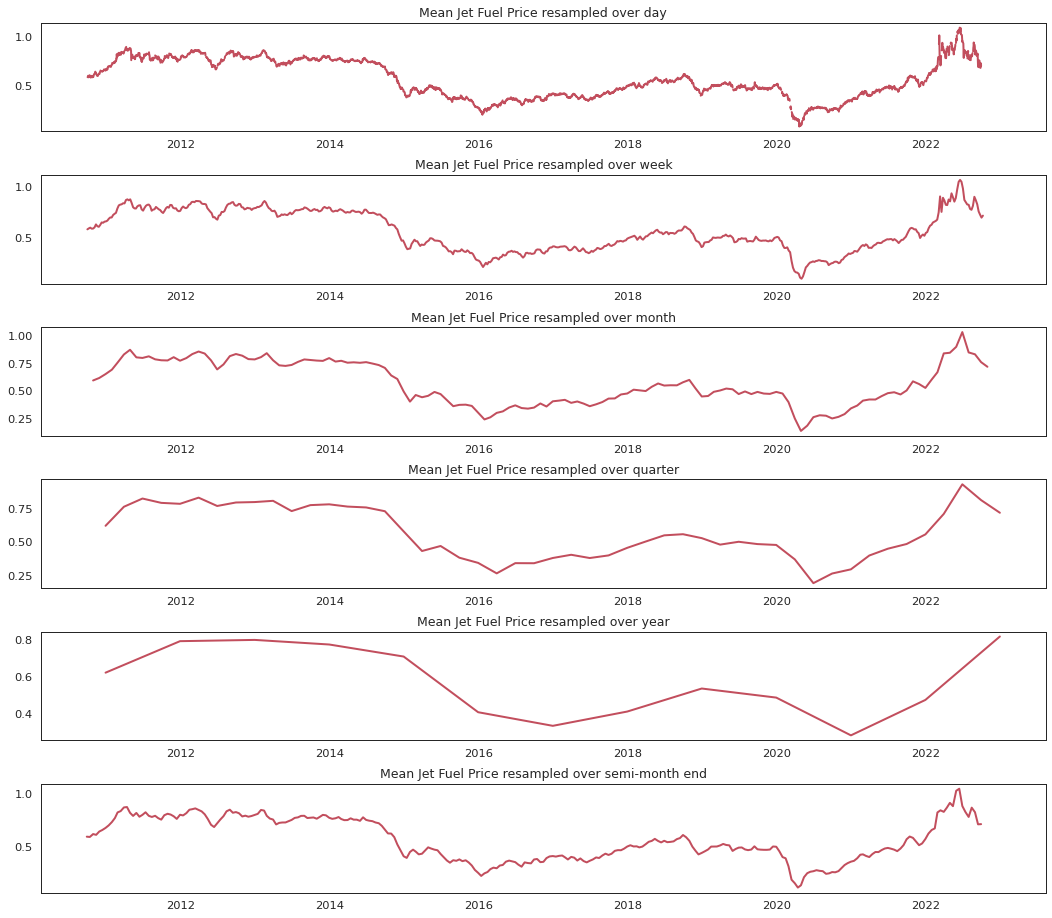

In [ ]:
fig= plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1= fig.add_subplot(6,1,1)
ax1.plot(df['Jet Fuel'].resample('D').mean(), linewidth=2, color='#c24e5d')
ax1.set_title('Mean Jet Fuel Price resampled over day')

ax2= fig.add_subplot(6,1,2, sharex=ax1)
ax2.plot(df['Jet Fuel'].resample('W').mean(), linewidth=2, color='#c24e5d')
ax2.set_title('Mean Jet Fuel Price resampled over week')
ax2.tick_params(axis='both', which='major')

ax3= fig.add_subplot(6,1,3, sharex=ax1)
ax3.plot(df['Jet Fuel'].resample('M').mean(), linewidth=2, color='#c24e5d')
ax3.set_title('Mean Jet Fuel Price resampled over month')
ax3.tick_params(axis='both', which='major')

ax4= fig.add_subplot(6,1,4, sharex=ax1)
ax4.plot(df['Jet Fuel'].resample('Q').mean(), linewidth=2, color='#c24e5d')
ax4.set_title('Mean Jet Fuel Price resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5= fig.add_subplot(6,1,5, sharex=ax1)
ax5.plot(df['Jet Fuel'].resample('A').mean(), linewidth=2, color='#c24e5d')
ax5.set_title('Mean Jet Fuel Price resampled over year')
ax5.tick_params(axis='both', which='major')

ax6= fig.add_subplot(6,1,6, sharex=ax1)
ax6.plot(df['Jet Fuel'].resample('SM').mean(), linewidth=2, color='#c24e5d')
ax6.set_title('Mean Jet Fuel Price resampled over semi-month end')
ax6.tick_params(axis='both', which='major')

### Plot mean Price grouped by year, quarter, month, and day

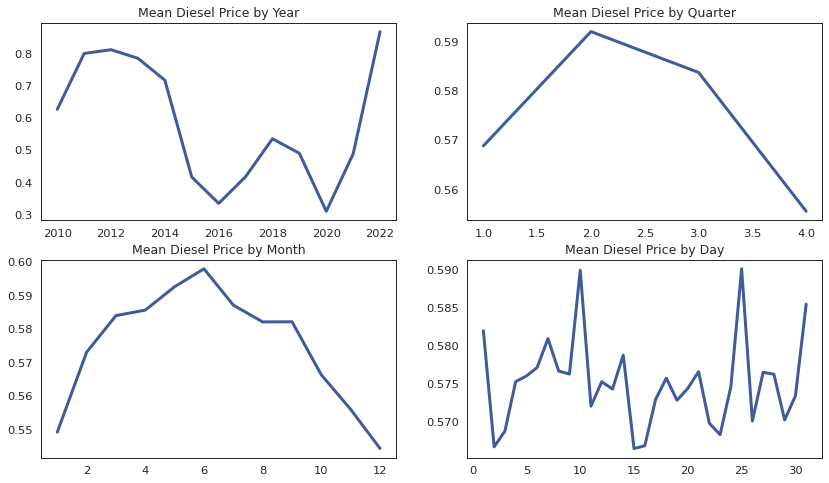

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').Diesel.agg('mean').plot(color='#3f5b9c', linewidth=3)
plt.xlabel('')
plt.title('Mean Diesel Price by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Diesel.agg('mean').plot(color='#3f5b9c', linewidth=3)
plt.xlabel('')
plt.title('Mean Diesel Price by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Diesel.agg('mean').plot(color='#3f5b9c', linewidth=3)
plt.xlabel('')
plt.title('Mean Diesel Price by Month')

plt.subplot(2,2,4)
df.groupby('day').Diesel.agg('mean').plot(color='#3f5b9c', linewidth=3)
plt.xlabel('')
plt.title('Mean Diesel Price by Day');

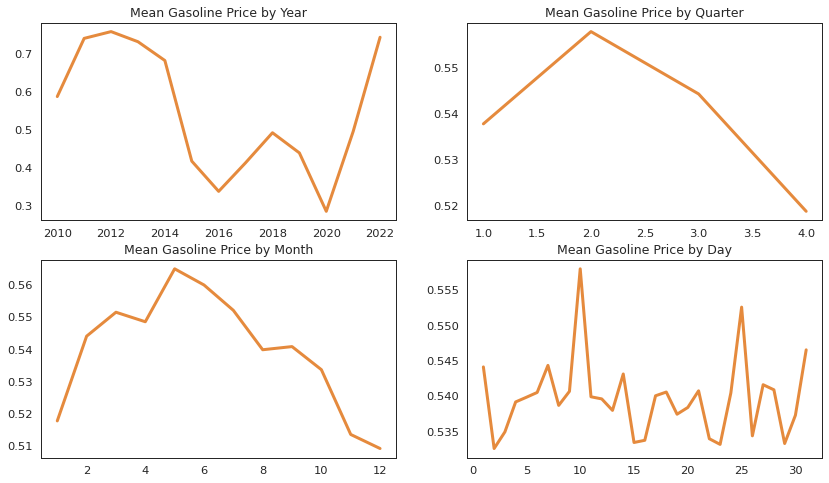

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').Gasoline.agg('mean').plot(color='#e58a3d', linewidth=3)
plt.xlabel('')
plt.title('Mean Gasoline Price by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Gasoline.agg('mean').plot(color='#e58a3d', linewidth=3)
plt.xlabel('')
plt.title('Mean Gasoline Price by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Gasoline.agg('mean').plot(color='#e58a3d', linewidth=3)
plt.xlabel('')
plt.title('Mean Gasoline Price by Month')

plt.subplot(2,2,4)
df.groupby('day').Gasoline.agg('mean').plot(color='#e58a3d', linewidth=3)
plt.xlabel('')
plt.title('Mean Gasoline Price by Day');

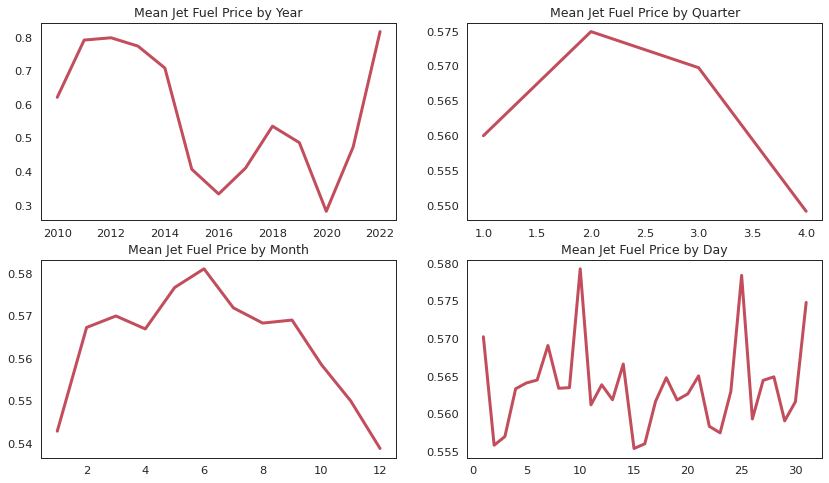

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year')['Jet Fuel'].agg('mean').plot(color='#c24e5d', linewidth=3)
plt.xlabel('')
plt.title('Mean Jet Fuel Price by Year')

plt.subplot(2,2,2)
df.groupby('quarter')['Jet Fuel'].agg('mean').plot(color='#c24e5d', linewidth=3)
plt.xlabel('')
plt.title('Mean Jet Fuel Price by Quarter')

plt.subplot(2,2,3)
df.groupby('month')['Jet Fuel'].agg('mean').plot(color='#c24e5d', linewidth=3)
plt.xlabel('')
plt.title('Mean Jet Fuel Price by Month')

plt.subplot(2,2,4)
df.groupby('day')['Jet Fuel'].agg('mean').plot(color='#c24e5d', linewidth=3)
plt.xlabel('')
plt.title('Mean Jet Fuel Price by Day');

# Part 3: Statistical Normality and Stationarity Tests

### Normality

In [ ]:
stat, p = stats.normaltest(df.Diesel)
print('Statistics = %.3f, p = %.3f' % (stat,p))
alpha = 0.05

if p > alpha:
  print('Data looks Gaussian (fail to reject H0)')
else:
  print('Data does not look Gaussian (reject H0)')

Statistics = 696.849, p = 0.000
Data does not look Gaussian (reject H0)


In [ ]:
print(df.Diesel.describe())

count   3006.0000
mean       0.5749
std        0.1995
min        0.1417
25%        0.4148
50%        0.5181
75%        0.7755
max        1.1618
Name: Diesel, dtype: float64


Kurtosis: -0.9992058469003671
Skewness: 0.22955710003395347


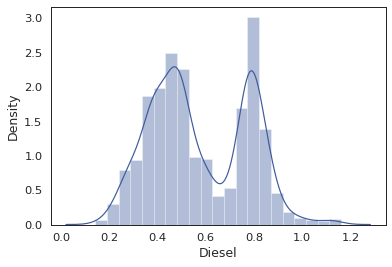

In [ ]:
sns.distplot(df.Diesel, color='#3f5b9c');
print('Kurtosis: {}'.format(stats.kurtosis(df.Diesel)))
print('Skewness: {}'.format(stats.skew(df.Diesel)))

In [ ]:
stat, p = stats.normaltest(df.Gasoline)
print('Statistics = %.3f, p = %.3f' % (stat,p))
alpha = 0.05

if p > alpha:
  print('Data looks Gaussian (fail to reject H0)')
else:
  print('Data does not look Gaussian (reject H0)')

Statistics = 797.328, p = 0.000
Data does not look Gaussian (reject H0)


In [ ]:
print(df.Gasoline.describe())

count   3006.0000
mean       0.5396
std        0.1772
min        0.0921
25%        0.4002
50%        0.5019
75%        0.7161
max        0.9794
Name: Gasoline, dtype: float64


Kurtosis: -1.02963189134042
Skewness: 0.11000815522053106


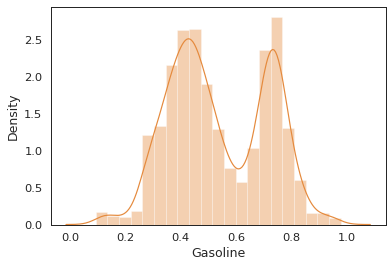

In [ ]:
sns.distplot(df.Gasoline, color='#e58a3d');
print('Kurtosis: {}'.format(stats.kurtosis(df.Gasoline)))
print('Skewness: {}'.format(stats.skew(df.Gasoline)))

In [ ]:
stat, p = stats.normaltest(df['Jet Fuel'])
print('Statistics = %.3f, p = %.3f' % (stat,p))
alpha = 0.05

if p > alpha:
  print('Data looks Gaussian (fail to reject H0)')
else:
  print('Data does not look Gaussian (reject H0)')

Statistics = 970.064, p = 0.000
Data does not look Gaussian (reject H0)


In [ ]:
print(df['Jet Fuel'].describe())

count   3006.0000
mean       0.5634
std        0.1961
min        0.0821
25%        0.4059
50%        0.5143
75%        0.7612
max        1.0945
Name: Jet Fuel, dtype: float64


Kurtosis: -1.064506694662053
Skewness: 0.10106851366143771


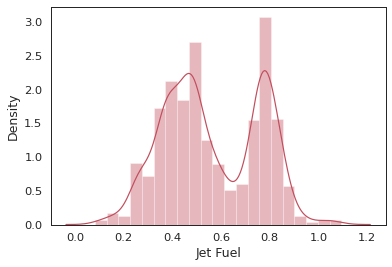

In [ ]:
sns.distplot(df['Jet Fuel'], color='#c24e5d');
print('Kurtosis: {}'.format(stats.kurtosis(df['Jet Fuel'])))
print('Skewness: {}'.format(stats.skew(df['Jet Fuel'])))

### Dickey-Fuller Test

In [ ]:
df1['Date']= pd.to_datetime(df1['Date'])

In [ ]:
df1.head()

Date  Diesel  Gasoline  Jet Fuel
0 2010-10-01  0.5928    0.5377    0.5837
1 2010-10-04  0.5949    0.5416    0.5876
2 2010-10-05  0.5961    0.5438    0.5891
3 2010-10-06  0.6049    0.5512    0.5986
4 2010-10-07  0.6085    0.5595    0.6026

In [ ]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

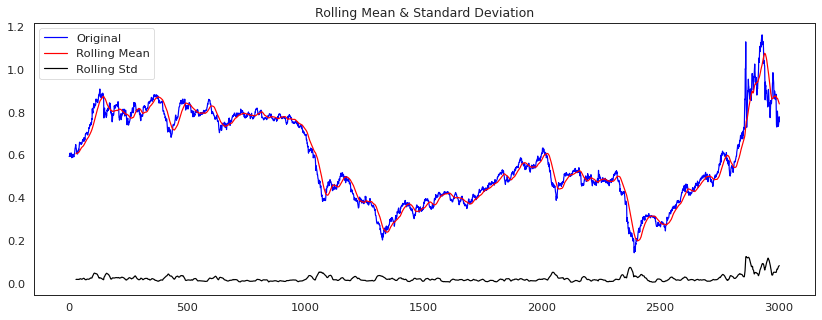

<Results of Dickey-Fuller Test>
Test Statistic                  -1.4217
p-value                          0.5718
#Lags Used                      24.0000
Number of Observations Used   2981.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(df1['Diesel'])

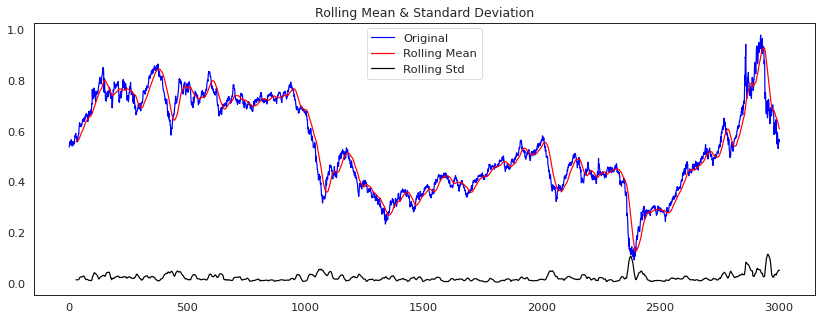

<Results of Dickey-Fuller Test>
Test Statistic                  -2.2579
p-value                          0.1859
#Lags Used                      20.0000
Number of Observations Used   2985.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(df1.Gasoline)

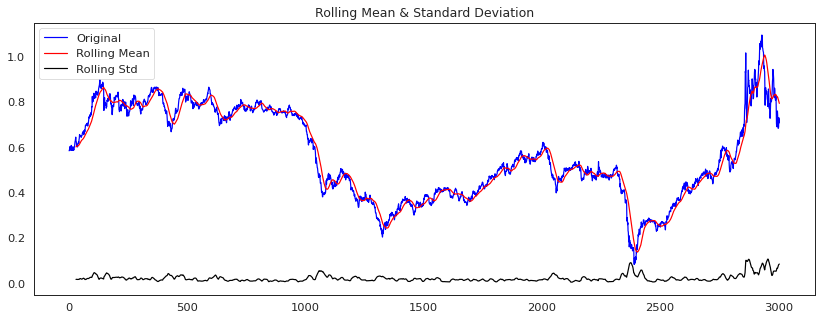

<Results of Dickey-Fuller Test>
Test Statistic                  -1.5746
p-value                          0.4963
#Lags Used                      23.0000
Number of Observations Used   2982.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(df1['Jet Fuel'])

# Part 4: Converting Non Stationary Time Series to Stationary using Differencing

In [ ]:
diesel = df1[['Date','Diesel']]
gasoline = df1[['Date','Gasoline']]
jet = df1[['Date','Jet Fuel']]

In [ ]:
#transform to stationary
diesel["diff_1"] = diesel["Diesel"].diff(periods=1)
diesel.head()

Date  Diesel  diff_1
0 2010-10-01  0.5928     NaN
1 2010-10-04  0.5949  0.0021
2 2010-10-05  0.5961  0.0012
3 2010-10-06  0.6049  0.0088
4 2010-10-07  0.6085  0.0036

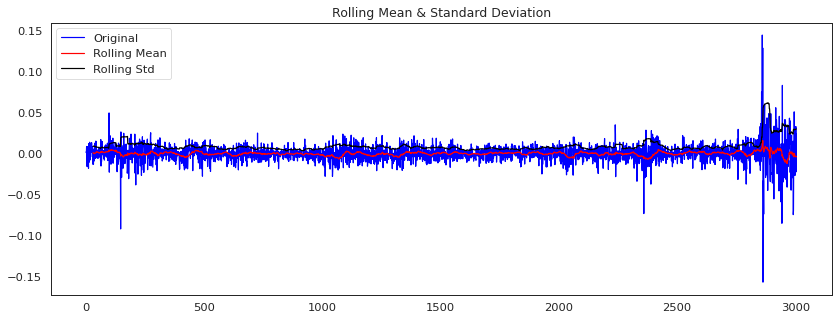

<Results of Dickey-Fuller Test>
Test Statistic                  -8.9536
p-value                          0.0000
#Lags Used                      29.0000
Number of Observations Used   2975.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(diesel["diff_1"].dropna())

In [ ]:
#transform to stationary
gasoline["diff_1"] = gasoline["Gasoline"].diff(periods=1)
gasoline.head()

Date  Gasoline  diff_1
0 2010-10-01    0.5377     NaN
1 2010-10-04    0.5416  0.0039
2 2010-10-05    0.5438  0.0022
3 2010-10-06    0.5512  0.0074
4 2010-10-07    0.5595  0.0083

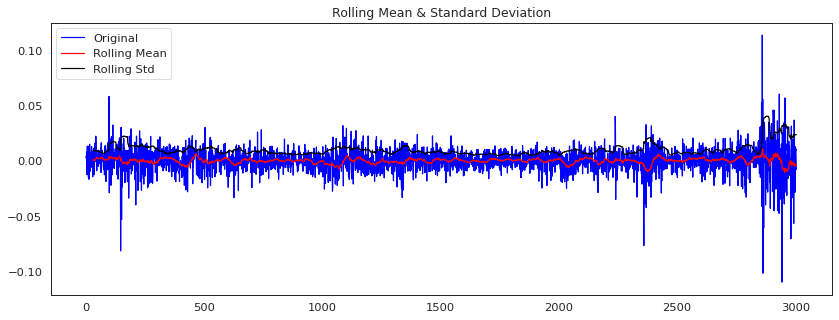

<Results of Dickey-Fuller Test>
Test Statistic                 -10.2444
p-value                          0.0000
#Lags Used                      19.0000
Number of Observations Used   2985.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(gasoline["diff_1"].dropna())

In [ ]:
#transform to stationary
jet["diff_1"] = jet["Jet Fuel"].diff(periods=1)
jet.head()

Date  Jet Fuel  diff_1
0 2010-10-01    0.5837     NaN
1 2010-10-04    0.5876  0.0039
2 2010-10-05    0.5891  0.0015
3 2010-10-06    0.5986  0.0095
4 2010-10-07    0.6026  0.0040

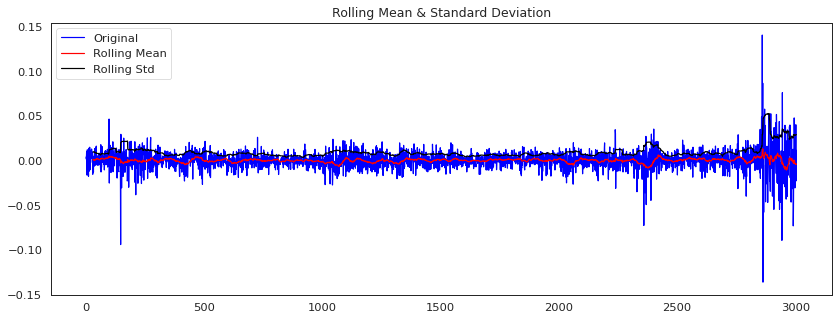

<Results of Dickey-Fuller Test>
Test Statistic                 -11.4139
p-value                          0.0000
#Lags Used                      22.0000
Number of Observations Used   2982.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(jet["diff_1"].dropna())

# Part 5: LSTM

### Gasoline LSTM

In [ ]:
gasoline.set_index('Date', inplace=True)
gasoline.head()

Gasoline  diff_1
Date                        
2010-10-01    0.5377     NaN
2010-10-04    0.5416  0.0039
2010-10-05    0.5438  0.0022
2010-10-06    0.5512  0.0074
2010-10-07    0.5595  0.0083

In [ ]:
gasoline1=gasoline.dropna()
print(gasoline1.shape)
gasoline1.head()

(3005, 2)


Gasoline  diff_1
Date                        
2010-10-04    0.5416  0.0039
2010-10-05    0.5438  0.0022
2010-10-06    0.5512  0.0074
2010-10-07    0.5595  0.0083
2010-10-08    0.5468 -0.0127

In [ ]:
#convert column to array
np.reshape(gasoline1.diff_1.values, (-1,1))

array([[ 0.00389968],
       [ 0.00220143],
       [ 0.00742198],
       ...,
       [ 0.01094428],
       [ 0.0033336 ],
       [-0.00798806]])

In [ ]:
dataset= gasoline1.diff_1.values #numpy.ndarray
dataset= dataset.astype('float32')
dataset= np.reshape(dataset,(-1,1))

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)
dataset #compressed

array([[0.50858426],
       [0.500985  ],
       [0.5243456 ],
       ...,
       [0.5401069 ],
       [0.5060512 ],
       [0.4553898 ]], dtype=float32)

In [ ]:
len(dataset)

3005

In [ ]:
# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
train_size=2905
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print(train.shape, test.shape)

(2905, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 30) (2874,) (69, 30) (69,)


In [ ]:
X_test

array([[0.52687865, 0.6963129 , 0.669575  , ..., 0.76132846, 0.33352095,
        0.42443004],
       [0.6963129 , 0.669575  , 0.5581199 , ..., 0.33352095, 0.42443004,
        0.5249085 ],
       [0.669575  , 0.5581199 , 0.2913031 , ..., 0.42443004, 0.5249085 ,
        0.5401069 ],
       ...,
       [0.4807205 , 0.5702223 , 0.5119617 , ..., 0.3633549 , 0.4086687 ,
        0.5479876 ],
       [0.5702223 , 0.5119617 , 0.48409793, ..., 0.4086687 , 0.5479876 ,
        0.53053755],
       [0.5119617 , 0.48409793, 0.5502392 , ..., 0.5479876 , 0.53053755,
        0.5401069 ]], dtype=float32)

In [ ]:
#reshape input to be [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
X_test

array([[[0.52687865, 0.6963129 , 0.669575  , ..., 0.76132846,
         0.33352095, 0.42443004]],

       [[0.6963129 , 0.669575  , 0.5581199 , ..., 0.33352095,
         0.42443004, 0.5249085 ]],

       [[0.669575  , 0.5581199 , 0.2913031 , ..., 0.42443004,
         0.5249085 , 0.5401069 ]],

       ...,

       [[0.4807205 , 0.5702223 , 0.5119617 , ..., 0.3633549 ,
         0.4086687 , 0.5479876 ]],

       [[0.5702223 , 0.5119617 , 0.48409793, ..., 0.4086687 ,
         0.5479876 , 0.53053755]],

       [[0.5119617 , 0.48409793, 0.5502392 , ..., 0.5479876 ,
         0.53053755, 0.5401069 ]]], dtype=float32)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 1, 30) (2874,) (69, 1, 30) (69,)


In [ ]:
#creating layers
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]))) #LSTM layer with 100 memory units
model.add(Dropout(0.2))
model.add(Dense(1)) # no activation applied 

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
42/42 [==============================] - 3s 24ms/step - loss: 0.0178 - val_loss: 0.0146
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0140
Epoch 3/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 7/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0140
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0027 - val_loss: 0.0140
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0140
Epoch 10/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0027 - val_loss: 0.0140
Epoch 11/2

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 5ms/step
Train Mean Absolute Error: 0.0075732698101606865
Train Root Mean Squared Error: 0.010523554394847928
Test Mean Absolute Error: 0.019697457496092866
Test Root Mean Squared Error: 0.026605656760195304


In [ ]:
print(train_predict.shape, test_predict.shape)

(2874, 1) (69, 1)


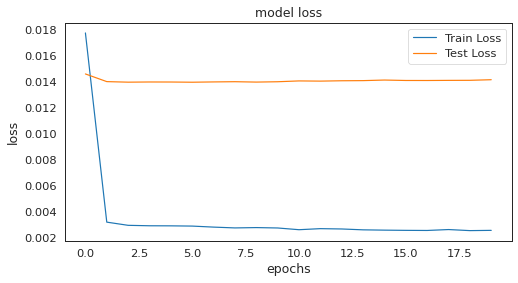

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

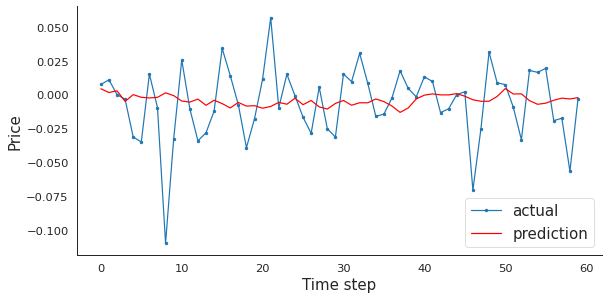

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

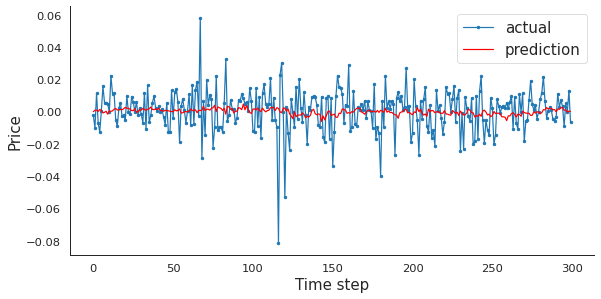

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  -0.008695243974623512
Test R2 Score:  -0.0771741845933509


In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima.utils import diff_inv

def inv_diff (df_orig_column,df_diff_column, periods):
    # Generate np.array for the diff_inv function - it includes first n values(n = 
    # periods) of original data & further diff values of given periods
    value = np.array(df_orig_column[:periods].tolist()+df_diff_column[periods:].tolist())

    # Generate np.array with inverse diff
    inv_diff_vals = diff_inv(value, periods,1 )[periods:]
    return inv_diff_vals

In [ ]:
gasoline['r_diff'] = inv_diff(gasoline.Gasoline, gasoline.diff_1, 1) 
gasoline.head()

Gasoline  diff_1  r_diff
Date                                
2010-10-01    0.5377     NaN  0.5377
2010-10-04    0.5416  0.0039  0.5416
2010-10-05    0.5438  0.0022  0.5438
2010-10-06    0.5512  0.0074  0.5512
2010-10-07    0.5595  0.0083  0.5595

In [ ]:
# print(r_train.index.min(), r_train.index.max())

In [ ]:
# print(r_train.index.min(), r_train.index.max())

In [ ]:
r_test = gasoline.r_diff[train_size+2:-(look_back)]
len(r_test)

69

In [ ]:
print(r_test.index.min(), r_test.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00


In [ ]:
#convert test_predict to series
test_predict_s = pd.Series(test_predict.reshape(-1))

In [ ]:
test_predict_s

0     0.0044
1     0.0016
2     0.0028
3    -0.0050
4     0.0000
       ...  
64   -0.0035
65   -0.0050
66   -0.0066
67   -0.0037
68   -0.0006
Length: 69, dtype: float32

In [ ]:
#use def inv_diff to get inverse-diff of predicted test values
r_predict = inv_diff(df['Gasoline'][train_size:], test_predict_s, 1) 

In [ ]:
r_predict_s = pd.Series(r_predict)
r_predict_s.index = r_test.index

In [ ]:
print(r_test.index.min(), r_test.index.max())
# print(r_train.index.min(), r_train.index.max())
print(r_predict_s.index.min(), r_predict_s.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00
2022-05-13 00:00:00 2022-08-22 00:00:00


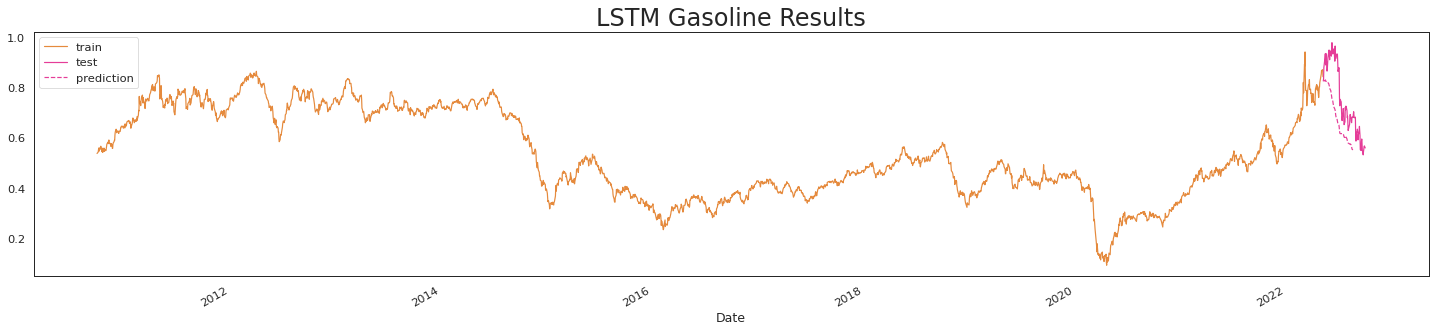

In [ ]:
df['Gasoline'][:train_size].plot(figsize = (25,5), label='train', color='#e58a3d')
df['Gasoline'][train_size:].plot(figsize = (25,5), label='test', color='#e53d98')
r_predict_s.plot(figsize = (25,5), label='prediction', color='#e53d98', linestyle='--')
plt.title('LSTM Gasoline Results', size=24)
plt.legend()
plt.show()

In [ ]:
print('Test MSE after Inverse Diff:', mean_absolute_error(r_test, r_predict_s))
print('Test RMSE after Inverse Diff:',np.sqrt(mean_absolute_error(r_test, r_predict_s)))
print('Test R2 Score after Inverse Diff: ', r2_score(r_test, r_predict_s))

Test MSE after Inverse Diff: 0.1348128039850707
Test RMSE after Inverse Diff: 0.3671686315374323
Test R2 Score after Inverse Diff:  -0.5729687972964623


In [ ]:
lstm_gas = r_predict_s.copy()

In [ ]:
len(lstm_gas)

69

### Diesel LSTM

In [ ]:
diesel.set_index('Date', inplace=True)
diesel.head()

Diesel  diff_1
Date                      
2010-10-01  0.5928     NaN
2010-10-04  0.5949  0.0021
2010-10-05  0.5961  0.0012
2010-10-06  0.6049  0.0088
2010-10-07  0.6085  0.0036

In [ ]:
diesel1=diesel.dropna()
print(diesel1.shape)
diesel1.head()

(3005, 2)


Diesel  diff_1
Date                      
2010-10-04  0.5949  0.0021
2010-10-05  0.5961  0.0012
2010-10-06  0.6049  0.0088
2010-10-07  0.6085  0.0036
2010-10-08  0.5929 -0.0157

In [ ]:
#convert column to array
np.reshape(diesel1.diff_1.values, (-1,1))

array([[ 0.00213854],
       [ 0.00119506],
       [ 0.00880574],
       ...,
       [ 0.03308442],
       [-0.02214014],
       [ 0.02383839]])

In [ ]:
dataset= diesel1.diff_1.values #numpy.ndarray
dataset= dataset.astype('float32')
dataset= np.reshape(dataset,(-1,1))

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)
dataset #compressed

array([[0.5269423 ],
       [0.5238095 ],
       [0.549081  ],
       ...,
       [0.62969923],
       [0.4463241 ],
       [0.5989975 ]], dtype=float32)

In [ ]:
len(dataset)

3005

In [ ]:
# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
train_size = 2905
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print(train.shape, test.shape)

(2905, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 30) (2874,) (69, 30) (69,)


In [ ]:
X_test

array([[0.4235589 , 0.6056808 , 0.4314954 , ..., 0.67105263, 0.3736424 ,
        0.5411445 ],
       [0.6056808 , 0.4314954 , 0.5215121 , ..., 0.3736424 , 0.5411445 ,
        0.5451128 ],
       [0.4314954 , 0.5215121 , 0.33688384, ..., 0.5411445 , 0.5451128 ,
        0.48141184],
       ...,
       [0.51712614, 0.6017126 , 0.53989136, ..., 0.43170425, 0.4342105 ,
        0.518797  ],
       [0.6017126 , 0.53989136, 0.5783208 , ..., 0.4342105 , 0.518797  ,
        0.5532581 ],
       [0.53989136, 0.5783208 , 0.6635338 , ..., 0.518797  , 0.5532581 ,
        0.62969923]], dtype=float32)

In [ ]:
#reshape input to be [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
X_test

array([[[0.4235589 , 0.6056808 , 0.4314954 , ..., 0.67105263,
         0.3736424 , 0.5411445 ]],

       [[0.6056808 , 0.4314954 , 0.5215121 , ..., 0.3736424 ,
         0.5411445 , 0.5451128 ]],

       [[0.4314954 , 0.5215121 , 0.33688384, ..., 0.5411445 ,
         0.5451128 , 0.48141184]],

       ...,

       [[0.51712614, 0.6017126 , 0.53989136, ..., 0.43170425,
         0.4342105 , 0.518797  ]],

       [[0.6017126 , 0.53989136, 0.5783208 , ..., 0.4342105 ,
         0.518797  , 0.5532581 ]],

       [[0.53989136, 0.5783208 , 0.6635338 , ..., 0.518797  ,
         0.5532581 , 0.62969923]]], dtype=float32)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 1, 30) (2874,) (69, 1, 30) (69,)


In [ ]:
#creating layers
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]))) #LSTM layer with 100 memory units
model.add(Dropout(0.2))
model.add(Dense(1)) # no activation applied 

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
42/42 [==============================] - 5s 32ms/step - loss: 0.0237 - val_loss: 0.0130
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0115
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0114
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0114
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0114
Epoch 6/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0113
Epoch 7/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0113
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0113
Epoch 9/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0114
Epoch 10/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0113
Epoch 11/20
4

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 6ms/step
Train Mean Absolute Error: 0.007086010144522336
Train Root Mean Squared Error: 0.010874533017261026
Test Mean Absolute Error: 0.024618647421379907
Test Root Mean Squared Error: 0.031831610476855315


In [ ]:
print(train_predict.shape, test_predict.shape)

(2874, 1) (69, 1)


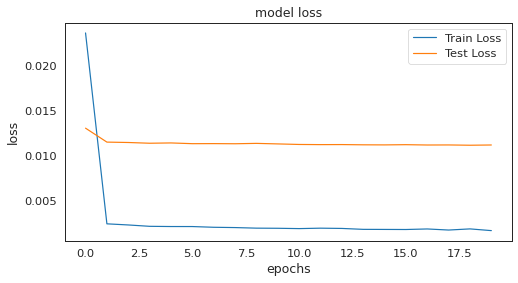

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

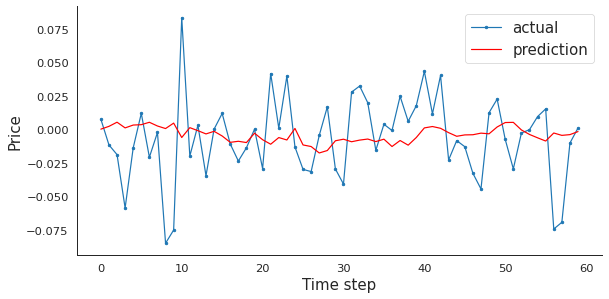

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

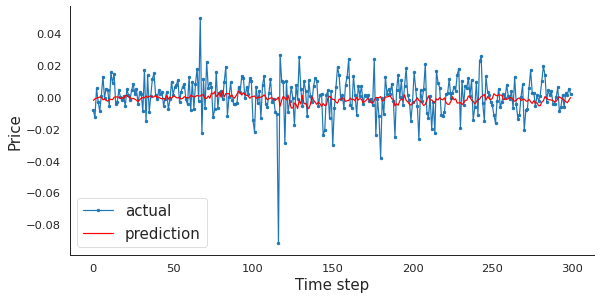

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  -0.018095028851368156
Test R2 Score:  -0.09399042537195434


In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima.utils import diff_inv

def inv_diff (df_orig_column,df_diff_column, periods):
    # Generate np.array for the diff_inv function - it includes first n values(n = 
    # periods) of original data & further diff values of given periods
    value = np.array(df_orig_column[:periods].tolist()+df_diff_column[periods:].tolist())

    # Generate np.array with inverse diff
    inv_diff_vals = diff_inv(value, periods,1 )[periods:]
    return inv_diff_vals

In [ ]:
diesel['r_diff'] = inv_diff(diesel.Diesel, diesel.diff_1, 1) 
diesel.head()

Diesel  diff_1  r_diff
Date                              
2010-10-01  0.5928     NaN  0.5928
2010-10-04  0.5949  0.0021  0.5949
2010-10-05  0.5961  0.0012  0.5961
2010-10-06  0.6049  0.0088  0.6049
2010-10-07  0.6085  0.0036  0.6085

In [ ]:

r_train = diesel.r_diff[1:train_size+1]
len(r_train)

2905

In [ ]:
print(r_train.index.min(), r_train.index.max())

2010-10-04 00:00:00 2022-05-11 00:00:00


In [ ]:
print(r_train.index.min(), r_train.index.max())

2010-10-04 00:00:00 2022-05-11 00:00:00


In [ ]:
r_test = diesel.r_diff[train_size+2:-(look_back)]
len(r_test)

69

In [ ]:
print(r_test.index.min(), r_test.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00


In [ ]:
#convert test_predict to series
test_predict_s = pd.Series(test_predict.reshape(-1))

In [ ]:
test_predict_s

0     0.0002
1     0.0023
2     0.0054
3     0.0011
4     0.0032
       ...  
64   -0.0056
65   -0.0095
66   -0.0097
67   -0.0037
68   -0.0009
Length: 69, dtype: float32

In [ ]:
#use def inv_diff to get inverse-diff of predicted test values
r_predict = inv_diff(r_test, test_predict_s, 1) 

In [ ]:
r_predict_s = pd.Series(r_predict)
r_predict_s.index = r_test.index

In [ ]:
print(r_test.index.min(), r_test.index.max())
print(r_train.index.min(), r_train.index.max())
print(r_predict_s.index.min(), r_predict_s.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00
2010-10-04 00:00:00 2022-05-11 00:00:00
2022-05-13 00:00:00 2022-08-22 00:00:00


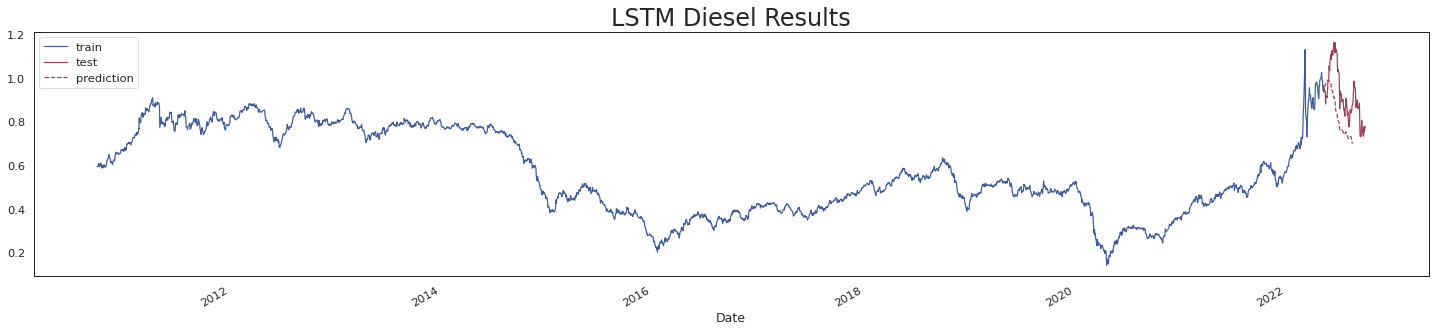

In [ ]:
df['Diesel'][:train_size].plot(figsize = (25,5), label='train', color='#3f5b9c')
df['Diesel'][train_size:].plot(figsize = (25,5), label='test', color='#9c3f5b')
r_predict_s.plot(figsize = (25,5), label='prediction', linestyle='--', color='#9c3f5b')
plt.title('LSTM Diesel Results', size=24)
plt.legend()
plt.show()

In [ ]:
print('Test MSE after Inverse Diff:', mean_absolute_error(r_test, r_predict_s))
print('Test RMSE after Inverse Diff:',np.sqrt(mean_absolute_error(r_test, r_predict_s)))
print('Test R2 Score after Inverse Diff: ', r2_score(r_test, r_predict_s))

Test MSE after Inverse Diff: 0.13837625618716826
Test RMSE after Inverse Diff: 0.3719895915038057
Test R2 Score after Inverse Diff:  -0.9482928960490968


In [ ]:
lstm_diesel = r_predict_s.copy()

In [ ]:
len(lstm_diesel)

69

### Jet Fuel LSTM

In [ ]:
jet.set_index('Date', inplace=True)
jet.head()

Jet Fuel  diff_1
Date                        
2010-10-01    0.5837     NaN
2010-10-04    0.5876  0.0039
2010-10-05    0.5891  0.0015
2010-10-06    0.5986  0.0095
2010-10-07    0.6026  0.0040

In [ ]:
jet1=jet.dropna()
print(jet1.shape)
jet1.head()

(3005, 2)


Jet Fuel  diff_1
Date                        
2010-10-04    0.5876  0.0039
2010-10-05    0.5891  0.0015
2010-10-06    0.5986  0.0095
2010-10-07    0.6026  0.0040
2010-10-08    0.5861 -0.0164

In [ ]:
#convert column to array
np.reshape(jet1.diff_1.values, (-1,1))

array([[ 0.00389968],
       [ 0.00150956],
       [ 0.00949762],
       ...,
       [ 0.04006611],
       [-0.02289492],
       [ 0.01125877]])

In [ ]:
dataset= jet1.diff_1.values #numpy.ndarray
dataset= dataset.astype('float32')
dataset= np.reshape(dataset,(-1,1))

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)
dataset #compressed

array([[0.50647587],
       [0.49784145],
       [0.5266985 ],
       ...,
       [0.637128  ],
       [0.40967965],
       [0.5330607 ]], dtype=float32)

In [ ]:
len(dataset)

3005

In [ ]:
# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
train_size = 2905
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print(train.shape, test.shape)

(2905, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 30) (2874,) (69, 30) (69,)


In [ ]:
X_test

array([[0.35719156, 0.5714611 , 0.41831404, ..., 0.6500796 , 0.29447854,
        0.48284483],
       [0.5714611 , 0.41831404, 0.5314702 , ..., 0.29447854, 0.48284483,
        0.4573961 ],
       [0.41831404, 0.5314702 , 0.29447854, ..., 0.48284483, 0.4573961 ,
        0.47648266],
       ...,
       [0.48057264, 0.5810044 , 0.5130652 , ..., 0.38127702, 0.39900026,
        0.49147925],
       [0.5810044 , 0.5130652 , 0.5587367 , ..., 0.39900026, 0.49147925,
        0.5157919 ],
       [0.5130652 , 0.5587367 , 0.6296297 , ..., 0.49147925, 0.5157919 ,
        0.637128  ]], dtype=float32)

In [ ]:
#reshape input to be [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
X_test

array([[[0.35719156, 0.5714611 , 0.41831404, ..., 0.6500796 ,
         0.29447854, 0.48284483]],

       [[0.5714611 , 0.41831404, 0.5314702 , ..., 0.29447854,
         0.48284483, 0.4573961 ]],

       [[0.41831404, 0.5314702 , 0.29447854, ..., 0.48284483,
         0.4573961 , 0.47648266]],

       ...,

       [[0.48057264, 0.5810044 , 0.5130652 , ..., 0.38127702,
         0.39900026, 0.49147925]],

       [[0.5810044 , 0.5130652 , 0.5587367 , ..., 0.39900026,
         0.49147925, 0.5157919 ]],

       [[0.5130652 , 0.5587367 , 0.6296297 , ..., 0.49147925,
         0.5157919 , 0.637128  ]]], dtype=float32)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2874, 1, 30) (2874,) (69, 1, 30) (69,)


In [ ]:
#creating layers
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]))) #LSTM layer with 100 memory units
model.add(Dropout(0.2))
model.add(Dense(1)) # no activation applied 

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
42/42 [==============================] - 4s 36ms/step - loss: 0.0236 - val_loss: 0.0137
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0025 - val_loss: 0.0117
Epoch 3/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 4/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0118
Epoch 5/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0117
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 0.0117
Epoch 7/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 8/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 9/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 10/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0118
Epoch 11/20
42/42 

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 6ms/step
Train Mean Absolute Error: 0.007167150956890036
Train Root Mean Squared Error: 0.010586584361297146
Test Mean Absolute Error: 0.023243363866899125
Test Root Mean Squared Error: 0.02981363183621213


In [ ]:
print(train_predict.shape, test_predict.shape)

(2874, 1) (69, 1)


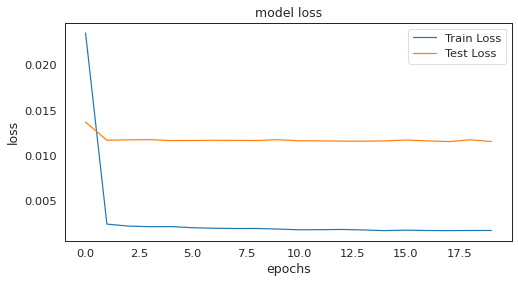

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

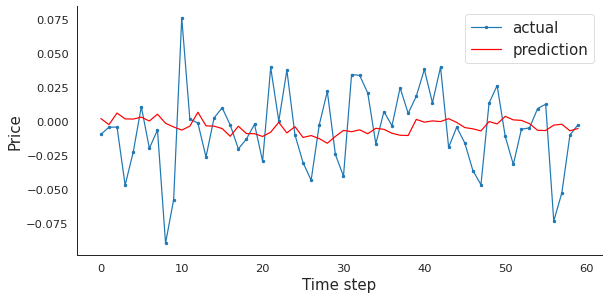

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

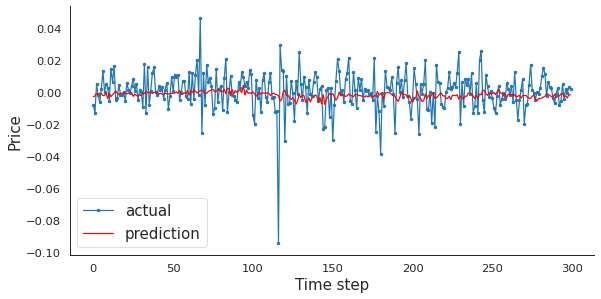

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  -0.037985814087608594
Test R2 Score:  -0.04722653660389953


In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima.utils import diff_inv

def inv_diff (df_orig_column,df_diff_column, periods):
    # Generate np.array for the diff_inv function - it includes first n values(n = 
    # periods) of original data & further diff values of given periods
    value = np.array(df_orig_column[:periods].tolist()+df_diff_column[periods:].tolist())

    # Generate np.array with inverse diff
    inv_diff_vals = diff_inv(value, periods,1 )[periods:]
    return inv_diff_vals

In [ ]:
jet['r_diff'] = inv_diff(jet['Jet Fuel'], jet.diff_1, 1) 
jet.head()

Jet Fuel  diff_1  r_diff
Date                                
2010-10-01    0.5837     NaN  0.5837
2010-10-04    0.5876  0.0039  0.5876
2010-10-05    0.5891  0.0015  0.5891
2010-10-06    0.5986  0.0095  0.5986
2010-10-07    0.6026  0.0040  0.6026

In [ ]:

r_train = jet.r_diff[1:train_size+1]
len(r_train)

2905

In [ ]:
print(r_train.index.min(), r_train.index.max())

2010-10-04 00:00:00 2022-05-11 00:00:00


In [ ]:
print(r_train.index.min(), r_train.index.max())

2010-10-04 00:00:00 2022-05-11 00:00:00


In [ ]:
r_test = jet.r_diff[train_size+2:-(look_back)]
len(r_test)

69

In [ ]:
print(r_test.index.min(), r_test.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00


In [ ]:
#convert test_predict to series
test_predict_s = pd.Series(test_predict.reshape(-1))

In [ ]:
test_predict_s

0     0.0020
1    -0.0025
2     0.0060
3     0.0017
4     0.0016
       ...  
64   -0.0082
65   -0.0075
66   -0.0051
67   -0.0052
68   -0.0050
Length: 69, dtype: float32

In [ ]:
#use def inv_diff to get inverse-diff of predicted test values
r_predict = inv_diff(r_test, test_predict_s, 1) 

In [ ]:
r_predict_s = pd.Series(r_predict)
r_predict_s.index = r_test.index

In [ ]:
print(r_test.index.min(), r_test.index.max())
print(r_train.index.min(), r_train.index.max())
print(r_predict_s.index.min(), r_predict_s.index.max())

2022-05-13 00:00:00 2022-08-22 00:00:00
2010-10-04 00:00:00 2022-05-11 00:00:00
2022-05-13 00:00:00 2022-08-22 00:00:00


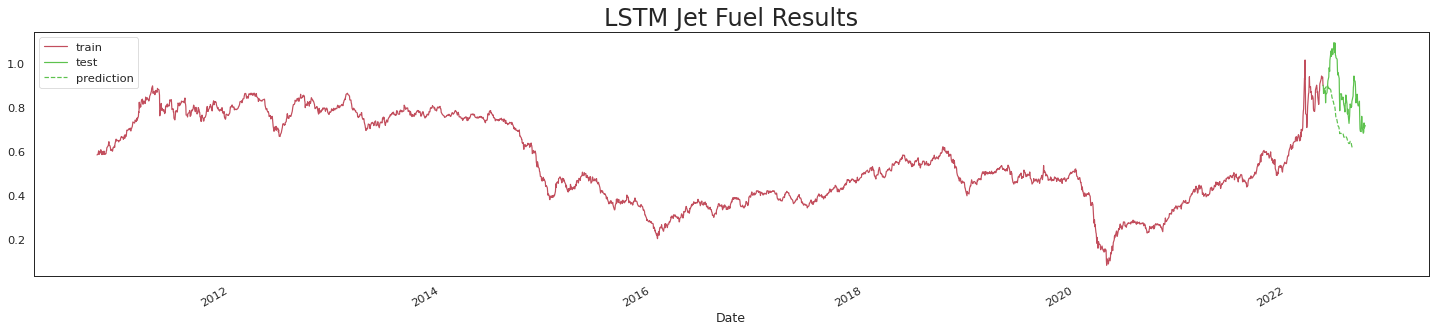

In [ ]:
df['Jet Fuel'][:train_size].plot(figsize = (25,5), label='train', color='#c24e5d')
df['Jet Fuel'][train_size:].plot(figsize = (25,5), label='test', color='#5dc24e')
r_predict_s.plot(figsize = (25,5), label='prediction', linestyle='--', color='#5dc24e')
plt.title('LSTM Jet Fuel Results', size=24)
plt.legend()
plt.show()

In [ ]:
print('Test MSE after Inverse Diff:', mean_absolute_error(r_test, r_predict_s))
print('Test RMSE after Inverse Diff:',np.sqrt(mean_absolute_error(r_test, r_predict_s)))
print('Test R2 Score after Inverse Diff: ', r2_score(r_test, r_predict_s))

Test MSE after Inverse Diff: 0.15849829175112304
Test RMSE after Inverse Diff: 0.39811843935080804
Test R2 Score after Inverse Diff:  -1.9958464437086425


In [ ]:
lstm_jet = r_predict_s.copy()
len(lstm_jet)

69

# Part 6: Stacked LSTM

### Gasoline Stacked LSTM

In [ ]:
# gasoline.set_index('Date', inplace=True)
gasoline.head()

Gasoline  diff_1  r_diff
Date                                
2010-10-01    0.5377     NaN  0.5377
2010-10-04    0.5416  0.0039  0.5416
2010-10-05    0.5438  0.0022  0.5438
2010-10-06    0.5512  0.0074  0.5512
2010-10-07    0.5595  0.0083  0.5595

In [ ]:
df1=gasoline.Gasoline
df1

Date
2010-10-01   0.5377
2010-10-04   0.5416
2010-10-05   0.5438
2010-10-06   0.5512
2010-10-07   0.5595
              ...  
2022-09-27   0.5447
2022-09-28   0.5535
2022-09-29   0.5644
2022-09-30   0.5678
2022-10-03   0.5598
Name: Gasoline, Length: 3006, dtype: float64

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1 #compressed

array([[0.50219733],
       [0.506592  ],
       [0.50907287],
       ...,
       [0.53232209],
       [0.53607882],
       [0.52707684]])

In [ ]:
len(df1)

3006

In [ ]:
# train_size = int(len(df1) * 0.80)
# test_size = len(df1) - train_size
train_size = 2906
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]

In [ ]:
print(train.shape, test.shape)

(2906, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30) (2875,) (69, 30) (69,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30, 1) (2875,) (69, 30, 1) (69,)


In [ ]:

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)



Epoch 1/20
42/42 [==============================] - 15s 201ms/step - loss: 0.0452 - val_loss: 0.0037
Epoch 2/20
42/42 [==============================] - 7s 159ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 3/20
42/42 [==============================] - 8s 188ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 4/20
42/42 [==============================] - 7s 166ms/step - loss: 0.0041 - val_loss: 0.0071
Epoch 5/20
42/42 [==============================] - 7s 169ms/step - loss: 0.0031 - val_loss: 0.0078
Epoch 6/20
42/42 [==============================] - 7s 169ms/step - loss: 0.0025 - val_loss: 0.0086
Epoch 7/20
42/42 [==============================] - 7s 166ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 8/20
42/42 [==============================] - 7s 165ms/step - loss: 0.0027 - val_loss: 0.0077
Epoch 9/20
42/42 [==============================] - 7s 168ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 10/20
42/42 [==============================] - 7s 159ms/step - loss: 0.0025 - val_loss: 0.007

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 19ms/step
Train Mean Absolute Error: 0.026516514816782362
Train Root Mean Squared Error: 0.03309877136448429
Test Mean Absolute Error: 0.050199013924925845
Test Root Mean Squared Error: 0.06381014318826664


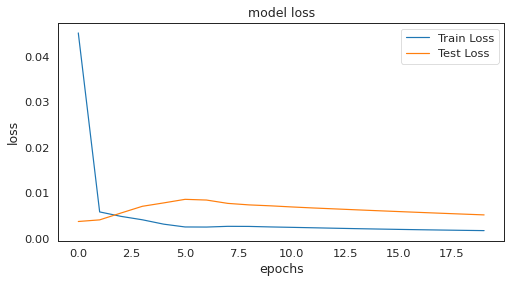

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

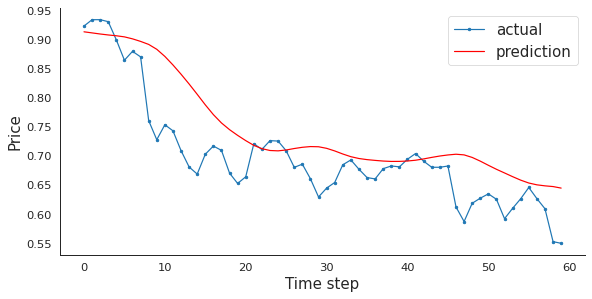

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

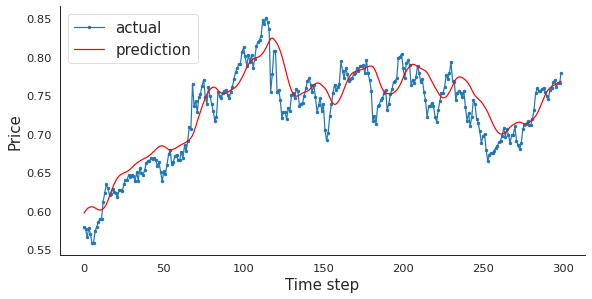

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  0.9640192621157091
Test R2 Score:  0.5713040677217514


In [ ]:
len(test)

100

In [ ]:
x_input=test[70:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5629288]
31
1 day input [0.68967961 0.67479444 0.66302807 0.66302807 0.66543805 0.58597959
 0.55776864 0.59320953 0.60306209 0.61142614 0.60093564 0.56329742
 0.58342784 0.60199887 0.62383045 0.60221151 0.58257726 0.51878367
 0.51552311 0.55698894 0.56719592 0.54869578 0.51651545 0.49574709
 0.51006521 0.51998866 0.53232209 0.53607882 0.52707684 0.5629288 ]
1 day output [[0.56187046]]
2 day input [0.67479444 0.66302807 0.66302807 0.66543805 0.58597959 0.55776864
 0.59320953 0.60306209 0.61142614 0.60093564 0.56329742 0.58342784
 0.60199887 0.62383045 0.60221151 0.58257726 0.51878367 0.51552311
 0.55698894 0.56719592 0.54869578 0.51651545 0.49574709 0.51006521
 0.51998866 0.53232209 0.53607882 0.52707684 0.5629288  0.56187046]
2 day output [[0.56271195]]
3 day input [0.66302807 0.66302807 0.66543805 0.58597959 0.55776864 0.59320953
 0.60306209 0.61142614 0.60093564 0.56329742 0.58342784 0.60199887
 0.62383045 0.60221151 0.58257726 0.51878367 0.51552311 0.55698894
 0.56719592 0.548695

In [ ]:
pred = pd.Series( (v[0] for v in lst_output) )

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
len(df1)

3006

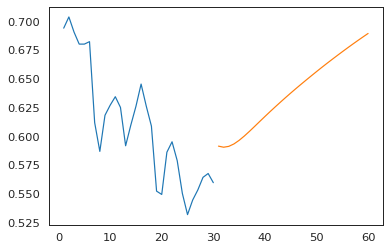

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2976:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
print(Y_test.shape, Y_train.shape, test_predict.shape)

(1, 69) (1, 2875) (69, 1)


In [ ]:
gasoline.index[:train_size-31]

DatetimeIndex(['2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06',
               '2010-10-07', '2010-10-08', '2010-10-11', '2010-10-12',
               '2010-10-13', '2010-10-14',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=2875, freq=None)

In [ ]:
test_predict.shape

(69, 1)

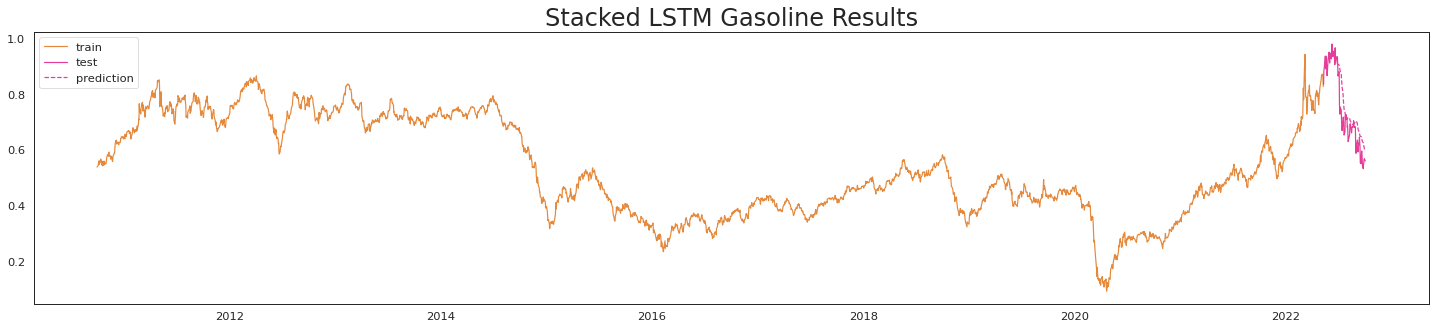

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Gasoline'][:train_size], label='train', color='#e58a3d')
plt.plot(df['Gasoline'][train_size:], label='test', color='#e53d98')
plt.plot(gasoline.index[-69:], test_predict[:,0], label='prediction', color='#e53d98', linestyle='--')
plt.title('Stacked LSTM Gasoline Results', size=24)
plt.legend()
plt.show()

In [ ]:
stlstm_gas = test_predict[:,0].copy()

In [ ]:
len(stlstm_gas)

69

### Diesel Stacked LSTM

In [ ]:
diesel.head()

Diesel  diff_1  r_diff
Date                              
2010-10-01  0.5928     NaN  0.5928
2010-10-04  0.5949  0.0021  0.5949
2010-10-05  0.5961  0.0012  0.5961
2010-10-06  0.6049  0.0088  0.6049
2010-10-07  0.6085  0.0036  0.6085

In [ ]:
df1=diesel.Diesel
df1

Date
2010-10-01   0.5928
2010-10-04   0.5949
2010-10-05   0.5961
2010-10-06   0.6049
2010-10-07   0.6085
              ...  
2022-09-27   0.7338
2022-09-28   0.7438
2022-09-29   0.7769
2022-09-30   0.7548
2022-10-03   0.7786
Name: Diesel, Length: 3006, dtype: float64

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1 #compressed

array([[0.44216303],
       [0.44425946],
       [0.445431  ],
       ...,
       [0.62270317],
       [0.60099889],
       [0.62436799]])

In [ ]:
len(df1)

3006

In [ ]:
# train_size = int(len(df1) * 0.80)
# test_size = len(df1) - train_size
train_size = 2906
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]

In [ ]:
print(train.shape, test.shape)

(2906, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30) (2875,) (69, 30) (69,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30, 1) (2875,) (69, 30, 1) (69,)


In [ ]:

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)



Epoch 1/20
42/42 [==============================] - 15s 204ms/step - loss: 0.0291 - val_loss: 0.0046
Epoch 2/20
42/42 [==============================] - 7s 164ms/step - loss: 0.0044 - val_loss: 0.0066
Epoch 3/20
42/42 [==============================] - 7s 163ms/step - loss: 0.0027 - val_loss: 0.0087
Epoch 4/20
42/42 [==============================] - 7s 160ms/step - loss: 0.0019 - val_loss: 0.0090
Epoch 5/20
42/42 [==============================] - 7s 163ms/step - loss: 0.0028 - val_loss: 0.0063
Epoch 6/20
42/42 [==============================] - 7s 161ms/step - loss: 0.0026 - val_loss: 0.0071
Epoch 7/20
42/42 [==============================] - 7s 159ms/step - loss: 0.0023 - val_loss: 0.0067
Epoch 8/20
42/42 [==============================] - 7s 162ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 9/20
42/42 [==============================] - 7s 160ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 10/20
42/42 [==============================] - 7s 159ms/step - loss: 0.0021 - val_loss: 0.006

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 18ms/step
Train Mean Absolute Error: 0.02474768163675861
Train Root Mean Squared Error: 0.031697209653535854
Test Mean Absolute Error: 0.05978442095029226
Test Root Mean Squared Error: 0.07141706228655956


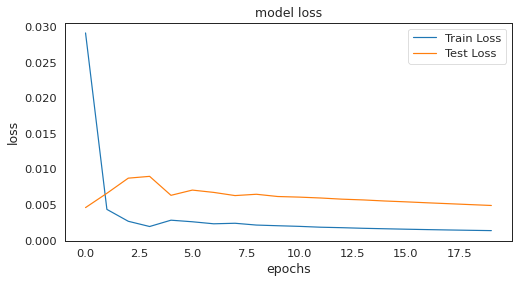

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

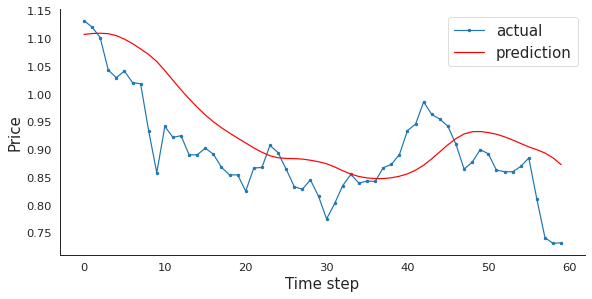

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

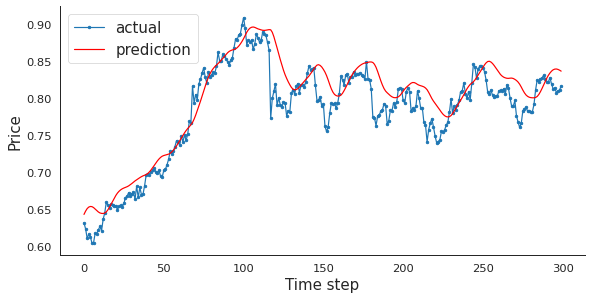

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  0.9725772364764862
Test R2 Score:  0.37960841894820607


In [ ]:
len(test)

100

In [ ]:
x_input=test[70:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[0.62809324]
31
1 day input [0.78789    0.82729066 0.80496979 0.79676902 0.78412875 0.75206561
 0.70853373 0.72074239 0.74287828 0.73554076 0.70668393 0.70403256
 0.70384758 0.71321988 0.72820323 0.65538291 0.58749538 0.57750647
 0.57855469 0.62856086 0.65082008 0.63201381 0.60599334 0.58071279
 0.58040449 0.59027007 0.62270317 0.60099889 0.62436799 0.62809324]
1 day output [[0.62765497]]
2 day input [0.82729066 0.80496979 0.79676902 0.78412875 0.75206561 0.70853373
 0.72074239 0.74287828 0.73554076 0.70668393 0.70403256 0.70384758
 0.71321988 0.72820323 0.65538291 0.58749538 0.57750647 0.57855469
 0.62856086 0.65082008 0.63201381 0.60599334 0.58071279 0.58040449
 0.59027007 0.62270317 0.60099889 0.62436799 0.62809324 0.62765497]
2 day output [[0.6285375]]
3 day input [0.80496979 0.79676902 0.78412875 0.75206561 0.70853373 0.72074239
 0.74287828 0.73554076 0.70668393 0.70403256 0.70384758 0.71321988
 0.72820323 0.65538291 0.58749538 0.57750647 0.57855469 0.62856086
 0.65082008 0.632013

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
len(df1)

3006

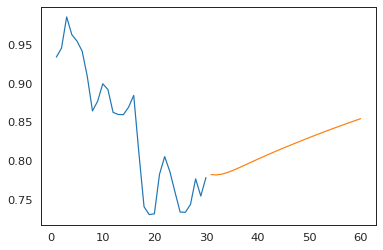

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2976:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
print(Y_test.shape, Y_train.shape, test_predict.shape)

(1, 69) (1, 2875) (69, 1)


In [ ]:
diesel.index[:train_size-31]

DatetimeIndex(['2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06',
               '2010-10-07', '2010-10-08', '2010-10-11', '2010-10-12',
               '2010-10-13', '2010-10-14',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=2875, freq=None)

In [ ]:
test_predict.shape

(69, 1)

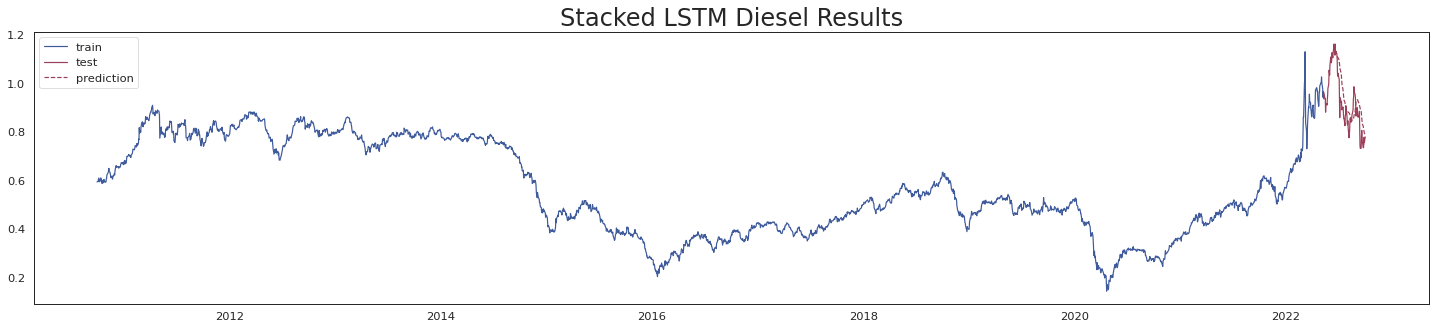

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Diesel'][:train_size], label='train', color='#3f5b9c')
plt.plot(df['Diesel'][train_size:], label='test', color='#9c3f5b')
plt.plot(gasoline.index[-69:], test_predict[:,0], label='prediction', color='#9c3f5b', linestyle='--')
plt.title('Stacked LSTM Diesel Results', size=24)
plt.legend()
plt.show()

In [ ]:
stlstm_diesel = test_predict[:,0].copy()

In [ ]:
len(stlstm_diesel)

69

### Jet Fuel Stacked LSTM

In [ ]:
jet.head()

Jet Fuel  diff_1  r_diff
Date                                
2010-10-01    0.5837     NaN  0.5837
2010-10-04    0.5876  0.0039  0.5876
2010-10-05    0.5891  0.0015  0.5891
2010-10-06    0.5986  0.0095  0.5986
2010-10-07    0.6026  0.0040  0.6026

In [ ]:
df1=jet['Jet Fuel']
df1

Date
2010-10-01   0.5837
2010-10-04   0.5876
2010-10-05   0.5891
2010-10-06   0.5986
2010-10-07   0.6026
              ...  
2022-09-27   0.6829
2022-09-28   0.6894
2022-09-29   0.7294
2022-09-30   0.7065
2022-10-03   0.7178
Name: Jet Fuel, Length: 3006, dtype: float64

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1 #compressed

array([[0.49543336],
       [0.49928549],
       [0.50077664],
       ...,
       [0.63939112],
       [0.6167754 ],
       [0.62789686]])

In [ ]:
len(df1)

3006

In [ ]:
# train_size = int(len(df1) * 0.80)
# test_size = len(df1) - train_size
train_size=2906
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]

In [ ]:
print(train.shape, test.shape)

(2906, 1) (100, 1)


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  #creates window pockkets
  X,Y = [], []
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    X.append(a)
    Y.append(dataset[i + look_back,0])
  return np.array(X), np.array(Y)

In [ ]:
#reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test= create_dataset(test, look_back)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30) (2875,) (69, 30) (69,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2875, 30, 1) (2875,) (69, 30, 1) (69,)


In [ ]:

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_10 (LSTM)              (None, 30, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)



Epoch 1/20
42/42 [==============================] - 16s 198ms/step - loss: 0.0353 - val_loss: 0.0049
Epoch 2/20
42/42 [==============================] - 7s 161ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 3/20
42/42 [==============================] - 6s 154ms/step - loss: 0.0022 - val_loss: 0.0068
Epoch 4/20
42/42 [==============================] - 7s 164ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 5/20
42/42 [==============================] - 7s 164ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 6/20
42/42 [==============================] - 7s 160ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 7/20
42/42 [==============================] - 7s 168ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 8/20
42/42 [==============================] - 7s 161ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 9/20
42/42 [==============================] - 7s 165ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 10/20
42/42 [==============================] - 7s 162ms/step - loss: 0.0021 - val_loss: 0.004

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#invert predictions
train_predict= scaler.inverse_transform(train_predict)
Y_train=scaler.inverse_transform([Y_train])

test_predict= scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

3/3 [==============================] - 0s 28ms/step
Train Mean Absolute Error: 0.025041080354880656
Train Root Mean Squared Error: 0.0318272004299587
Test Mean Absolute Error: 0.04904038268259749
Test Root Mean Squared Error: 0.05994168924894119


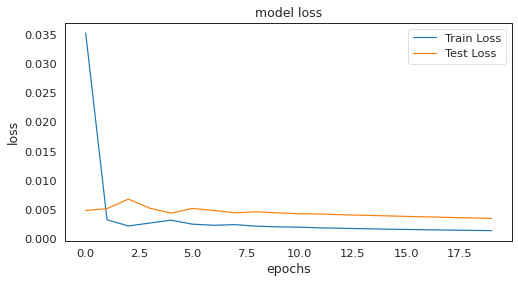

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

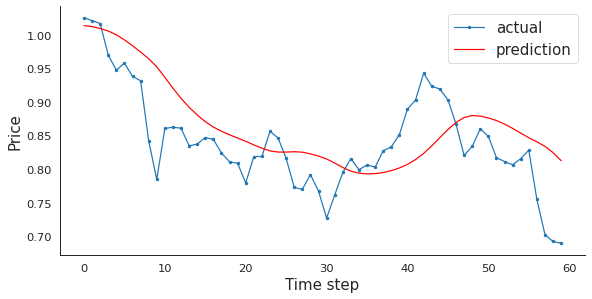

In [ ]:
aa=[x for x in range(60)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

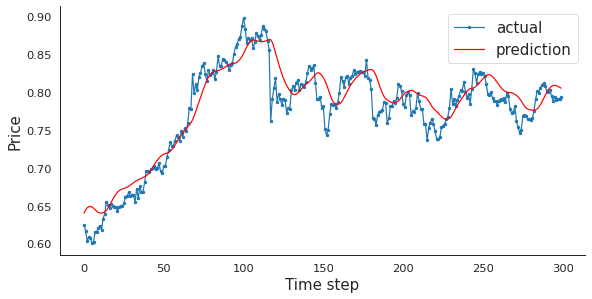

In [ ]:
aa=[x for x in range(300)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_train[0][:300], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:300], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
from sklearn.metrics import r2_score

print('Train R2 Score: ', r2_score(Y_train[0], train_predict[:,0]))
print('Test R2 Score: ', r2_score(Y_test[0], test_predict[:,0]))

Train R2 Score:  0.9721227615612467
Test R2 Score:  0.45567679342918455


In [ ]:
len(test)

100

In [ ]:
x_input=test[70:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[0.6398569]
31
1 day input [0.81093507 0.85020193 0.83125194 0.8269649  0.8111836  0.77545822
 0.72941907 0.74259087 0.7684374  0.7574402  0.72612613 0.72034793
 0.71550171 0.72463498 0.73699907 0.66461634 0.61273687 0.60273377
 0.60018639 0.64728176 0.66902765 0.64958062 0.61919851 0.59366263
 0.5934141  0.59981361 0.63939112 0.6167754  0.62789686 0.63985687]
1 day output [[0.6392019]]
2 day input [0.85020193 0.83125194 0.8269649  0.8111836  0.77545822 0.72941907
 0.74259087 0.7684374  0.7574402  0.72612613 0.72034793 0.71550171
 0.72463498 0.73699907 0.66461634 0.61273687 0.60273377 0.60018639
 0.64728176 0.66902765 0.64958062 0.61919851 0.59366263 0.5934141
 0.59981361 0.63939112 0.6167754  0.62789686 0.63985687 0.63920188]
2 day output [[0.6398293]]
3 day input [0.83125194 0.8269649  0.8111836  0.77545822 0.72941907 0.74259087
 0.7684374  0.7574402  0.72612613 0.72034793 0.71550171 0.72463498
 0.73699907 0.66461634 0.61273687 0.60273377 0.60018639 0.64728176
 0.66902765 0.64958062 

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
len(df1)

3006

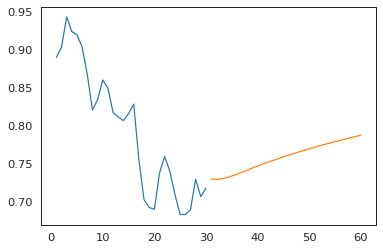

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2976:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
print(Y_test.shape, Y_train.shape, test_predict.shape)

(1, 69) (1, 2875) (69, 1)


In [ ]:
diesel.index[:train_size-31]

DatetimeIndex(['2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06',
               '2010-10-07', '2010-10-08', '2010-10-11', '2010-10-12',
               '2010-10-13', '2010-10-14',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=2875, freq=None)

In [ ]:
test_predict.shape

(69, 1)

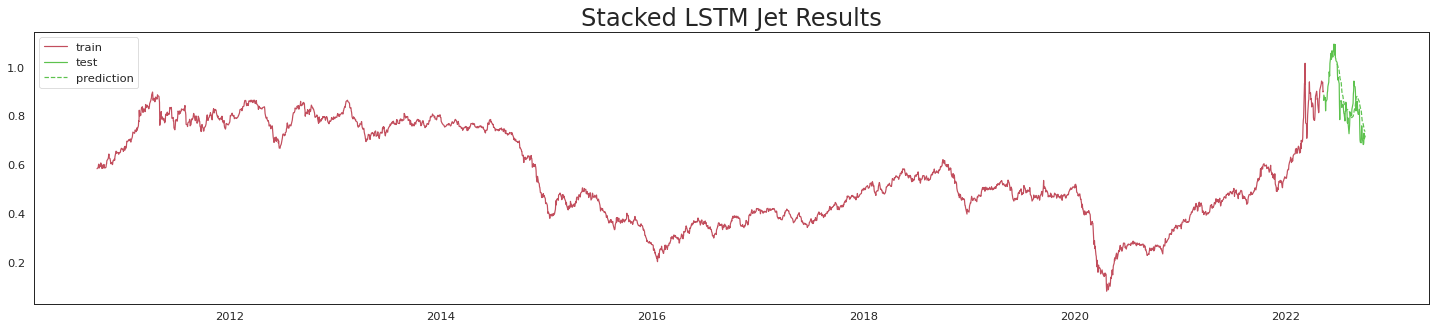

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Jet Fuel'][:train_size], label='train', color='#c24e5d')
plt.plot(df['Jet Fuel'][train_size:], label='test', color='#5dc24e')
plt.plot(gasoline.index[-69:], test_predict[:,0], label='prediction', color='#5dc24e', linestyle='--')
plt.title('Stacked LSTM Jet Results', size=24)
plt.legend()
plt.show()

In [ ]:
stlstm_jet = test_predict[:,0].copy()

In [ ]:
len(stlstm_jet)

69

# Part 7: ARIMA

### Gasoline ARIMA

In [ ]:
# load required libraries
import sys
import statsmodels as ss
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
gasoline.head()

Gasoline  diff_1  r_diff
Date                                
2010-10-01    0.5377     NaN  0.5377
2010-10-04    0.5416  0.0039  0.5416
2010-10-05    0.5438  0.0022  0.5438
2010-10-06    0.5512  0.0074  0.5512
2010-10-07    0.5595  0.0083  0.5595

In [ ]:
gas = gasoline['Gasoline']
gas.head()

Date
2010-10-01   0.5377
2010-10-04   0.5416
2010-10-05   0.5438
2010-10-06   0.5512
2010-10-07   0.5595
Name: Gasoline, dtype: float64

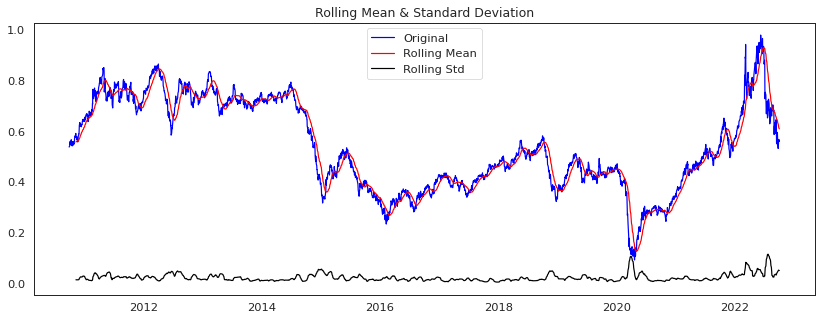

<Results of Dickey-Fuller Test>
Test Statistic                  -2.2579
p-value                          0.1859
#Lags Used                      20.0000
Number of Observations Used   2985.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(gas)

In [ ]:
#log transform
gas_log = np.log(gas)
gas_log.head()

Date
2010-10-01   -0.6204
2010-10-04   -0.6132
2010-10-05   -0.6091
2010-10-06   -0.5956
2010-10-07   -0.5806
Name: Gasoline, dtype: float64

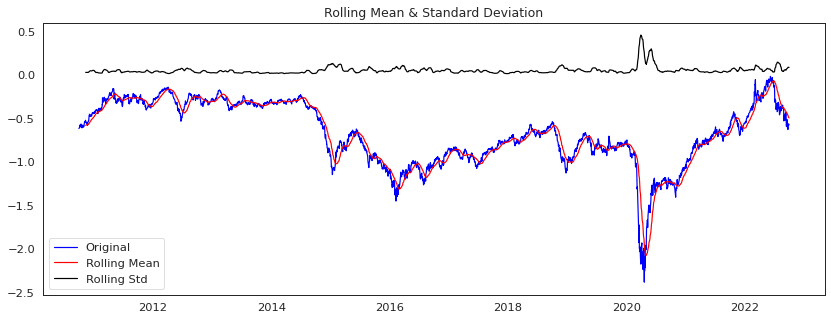

<Results of Dickey-Fuller Test>
Test Statistic                  -2.6160
p-value                          0.0897
#Lags Used                      27.0000
Number of Observations Used   2978.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(gas_log)

In [ ]:
#transform to stationary
gas_log_diff = gas_log.diff(periods=1)
gas_log_diff

Date
2010-10-01       NaN
2010-10-04    0.0072
2010-10-05    0.0041
2010-10-06    0.0136
2010-10-07    0.0149
               ...  
2022-09-27    0.0236
2022-09-28    0.0160
2022-09-29    0.0196
2022-09-30    0.0059
2022-10-03   -0.0142
Name: Gasoline, Length: 3006, dtype: float64

In [ ]:
gas_log_diff.dropna(inplace=True)

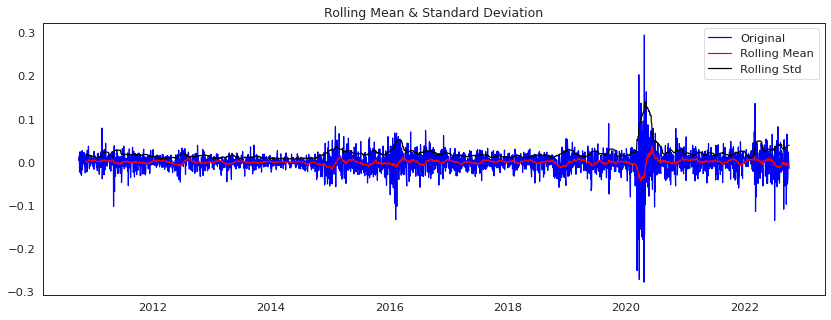

<Results of Dickey-Fuller Test>
Test Statistic                  -9.6015
p-value                          0.0000
#Lags Used                      26.0000
Number of Observations Used   2978.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(gas_log_diff)

In [ ]:
len(gas_log_diff)

3005

In [ ]:
# train_size = int(len(gas_log_diff) * 0.80)
train_size = 2905

In [ ]:
train = gas_log_diff[:train_size]
test = gas_log_diff[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2905
Test shape: 100


In [ ]:
print(train.head(3), print(test.head(3)))

Date
2022-05-12   0.0096
2022-05-13   0.0535
2022-05-17   0.0443
Name: Gasoline, dtype: float64
Date
2010-10-04   0.0072
2010-10-05   0.0041
2010-10-06   0.0136
Name: Gasoline, dtype: float64 None


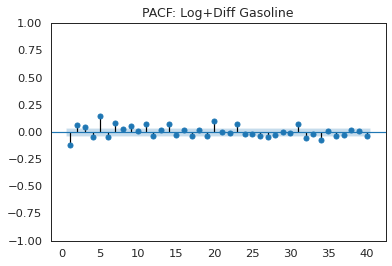

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

title = 'PACF: Log+Diff Gasoline'
lags = 40
plot_pacf(train, title=title, lags=lags, zero=False, method=("ols"));

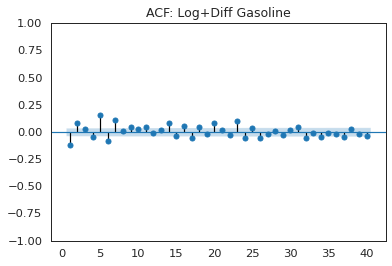

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# plot ACF function for PH covid-19 deaths
title = 'ACF: Log+Diff Gasoline'
lags = 40
plot_acf(train, title=title, lags=lags, zero=False);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fitting a simple ARIMA(1,1,1) model
model = ARIMA(train, order=(1,1,1))
model_result = model.fit()
model_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Gasoline   No. Observations:                 2905
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6531.830
Date:                Thu, 15 Dec 2022   AIC                         -13057.659
Time:                        13:24:50   BIC                         -13039.738
Sample:                             0   HQIC                        -13051.202
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1237      0.006    -19.439      0.000      -0.136      -0.111
ma.L1         -0.9997      0.002   -498.091      0.000      -1.004      -0.996
sigma2         0.0006   5.19e-06    125.107      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             63078.15
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               6.34   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima111_preds = model_result.predict(start=start, end=end, dynamic=False).rename('ARIMA111 Predictions')
arima111_mse = mean_squared_error(test, arima111_preds)
print("ARIMA(1,1,1) MSE: " + str(arima111_mse))
print("ARIMA(1,1,1) RMSE: " + str(np.sqrt(arima111_mse)))

ARIMA(1,1,1) MSE: 0.0013042661134169834
ARIMA(1,1,1) RMSE: 0.03611462464732235


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# use auto_arima to automate ARIMA model selection

from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(
    train,
    exogenous=None,     # don't use exogenous variables
    m=1,                # don't add seasonal cycles as I'm interested only in an ARIMA model
    max_order=None,     # don't limit total number of non-seasonal AR and MA components
    max_p=15,           # use maximum of 15 lags for AR and MA components as implied by the ACF plot of the ARIMA(1,1,1) residuals
    max_q=15,
    max_d=2,            # use max integration of 2 to reach stationarity
    maxiter=100,
    alpha=0.05,         # use 0.05 level of significance
    njobs=-1,           # fit as many as possible models
    trend="ct",
    start_P=0,          # don't use seasonal components as I'm interested only in an ARIMA model
    start_Q=0,
    start_D=0,
    max_P=0,
    max_Q=0,
    max_D=0)

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2905
Model:               SARIMAX(2, 0, 1)   Log Likelihood                6552.438
Date:                Thu, 15 Dec 2022   AIC                         -13092.875
Time:                        13:25:22   BIC                         -13057.030
Sample:                             0   HQIC                        -13079.961
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.000     -1.272      0.203      -0.001       0.000
drift        2.39e-07   1.82e-07      1.313      0.189   -1.18e-07    5.96e-07
ar.L1          0.6055      0.037     16.185      0.000       0.532       0.679
ar.L2          0.1546      0.006     25.627      0.000       0.143       0.166
ma.L1         -0.7247      0.038    -18.877      0.000      -0.800      -0.649
sigma2         0.0006   5.77e-06    111.914      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             65186.01
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               6.12   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_auto = ARIMA(train, order=(2,0,1))
model_auto_result = model_auto.fit()
model_auto_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Gasoline   No. Observations:                 2905
Model:                 ARIMA(2, 0, 1)   Log Likelihood                6553.622
Date:                Thu, 15 Dec 2022   AIC                         -13097.243
Time:                        13:25:23   BIC                         -13067.372
Sample:                             0   HQIC                        -13086.481
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.251      0.802      -0.001       0.001
ar.L1          0.6094      0.036     16.738      0.000       0.538       0.681
ar.L2          0.1553      0.006     25.939      0.000       0.144       0.167
ma.L1         -0.7285      0.037    -19.483      0.000      -0.802      -0.655
sigma2         0.0006    5.7e-06    112.750      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             64754.28
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               6.21   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima201_preds = model_auto_result.predict(start=start, end=end, dynamic=False).rename('ARIMA201 Predictions')
arima201_mse = mean_squared_error(test, arima201_preds)
print("ARIMA(1,1,1) MSE: " + str(arima201_mse))
print("ARIMA(1,1,1) RMSE: " + str(np.sqrt(arima201_mse)))

ARIMA(1,1,1) MSE: 0.0013041805518204759
ARIMA(1,1,1) RMSE: 0.036113440044123125


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
arima111_preds.head()

2905   0.0031
2906   0.0001
2907   0.0005
2908   0.0004
2909   0.0005
Name: ARIMA111 Predictions, dtype: float64

In [ ]:
arima201_preds.head()

2905    0.0023
2906   -0.0018
2907   -0.0007
2908   -0.0007
2909   -0.0005
Name: ARIMA201 Predictions, dtype: float64

In [ ]:
#return the predicted values to reverse diff and reverse log to match the original dataset
arima201_r_diff = inv_diff(gas_log[train_size:], arima201_preds, 1)  
arima201_r_diff


array([-0.19042552, -0.19222463, -0.1929343 , -0.1936117 , -0.19410026,
       -0.19446872, -0.19473467, -0.1949195 , -0.19503898, -0.19510604,
       -0.195131  , -0.19512217, -0.19508621, -0.19502847, -0.19495324,
       -0.19486397, -0.19476343, -0.19465385, -0.194537  , -0.19441431,
       -0.19428695, -0.19415583, -0.19402168, -0.19388512, -0.19374661,
       -0.19360654, -0.19346522, -0.19332288, -0.19317975, -0.19303596,
       -0.19289165, -0.19274692, -0.19260186, -0.19245653, -0.19231098,
       -0.19216526, -0.1920194 , -0.19187343, -0.19172736, -0.19158123,
       -0.19143503, -0.1912888 , -0.19114252, -0.19099621, -0.19084988,
       -0.19070353, -0.19055716, -0.19041079, -0.1902644 , -0.190118  ,
       -0.1899716 , -0.18982519, -0.18967878, -0.18953236, -0.18938595,
       -0.18923953, -0.1890931 , -0.18894668, -0.18880026, -0.18865383,
       -0.18850741, -0.18836098, -0.18821455, -0.18806812, -0.1879217 ,
       -0.18777527, -0.18762884, -0.18748241, -0.18733598, -0.18

In [ ]:
arima201_r_diff_exp = np.exp(arima201_r_diff)
arima201_r_diff_exp

array([0.82660732, 0.8251215 , 0.82453614, 0.82397779, 0.82357533,
       0.82327193, 0.82305301, 0.8229009 , 0.82280258, 0.82274741,
       0.82272687, 0.82273414, 0.82276372, 0.82281123, 0.82287313,
       0.82294659, 0.82302934, 0.82311953, 0.82321572, 0.82331672,
       0.82342159, 0.82352957, 0.82364004, 0.82375253, 0.82386664,
       0.82398204, 0.8240985 , 0.8242158 , 0.82433379, 0.82445233,
       0.82457131, 0.82469066, 0.8248103 , 0.82493018, 0.82505025,
       0.82517049, 0.82529086, 0.82541134, 0.82553191, 0.82565256,
       0.82577327, 0.82589404, 0.82601486, 0.82613572, 0.82625662,
       0.82637755, 0.82649851, 0.8266195 , 0.82674052, 0.82686156,
       0.82698262, 0.82710371, 0.82722481, 0.82734594, 0.82746709,
       0.82758825, 0.82770944, 0.82783064, 0.82795187, 0.82807311,
       0.82819437, 0.82831565, 0.82843695, 0.82855826, 0.82867959,
       0.82880094, 0.82892231, 0.8290437 , 0.8291651 , 0.82928653,
       0.82940797, 0.82952942, 0.8296509 , 0.82977239, 0.82989

In [ ]:
len(arima201_r_diff_exp)

100

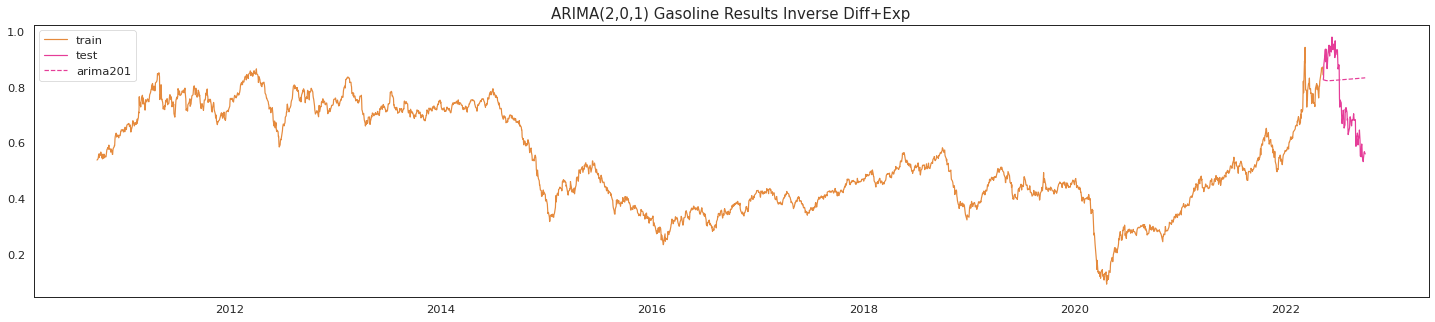

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(gasoline['Gasoline'][:train_size], label='train', color='#e58a3d')
plt.plot(gasoline['Gasoline'][train_size:], label='test', color='#e53d98')
plt.plot(gasoline.index[-100:], arima201_r_diff_exp, label='arima201', color='#e53d98', linestyle='--')
plt.title('ARIMA(2,0,1) Gasoline Results Inverse Diff+Exp', size=15)
plt.legend()
plt.show()

In [ ]:
arima_gas = arima201_r_diff_exp

In [ ]:
len(arima_gas)

100

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test, arima_gas))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test, arima_gas)))
print('Test R2 Score: ', r2_score(test, arima_gas))

Test Mean Absolute Error: 0.8310929407507208
Test Root Mean Squared Error: 0.911642989744736
Test R2 Score:  -537.3534703455863


### Diesel ARIMA

In [ ]:
diesel.head()

Diesel  diff_1  r_diff
Date                              
2010-10-01  0.5928     NaN  0.5928
2010-10-04  0.5949  0.0021  0.5949
2010-10-05  0.5961  0.0012  0.5961
2010-10-06  0.6049  0.0088  0.6049
2010-10-07  0.6085  0.0036  0.6085

In [ ]:
diesel = diesel['Diesel']
diesel.head()

Date
2010-10-01   0.5928
2010-10-04   0.5949
2010-10-05   0.5961
2010-10-06   0.6049
2010-10-07   0.6085
Name: Diesel, dtype: float64

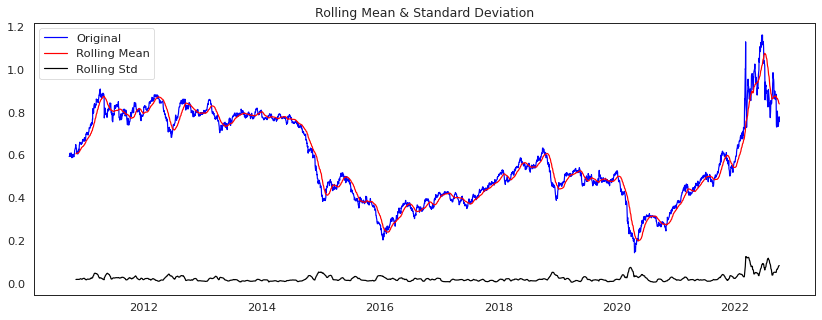

<Results of Dickey-Fuller Test>
Test Statistic                  -1.4217
p-value                          0.5718
#Lags Used                      24.0000
Number of Observations Used   2981.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(diesel)

In [ ]:
#log transform
d_log = np.log(diesel)
d_log.head()

Date
2010-10-01   -0.5230
2010-10-04   -0.5194
2010-10-05   -0.5174
2010-10-06   -0.5027
2010-10-07   -0.4967
Name: Diesel, dtype: float64

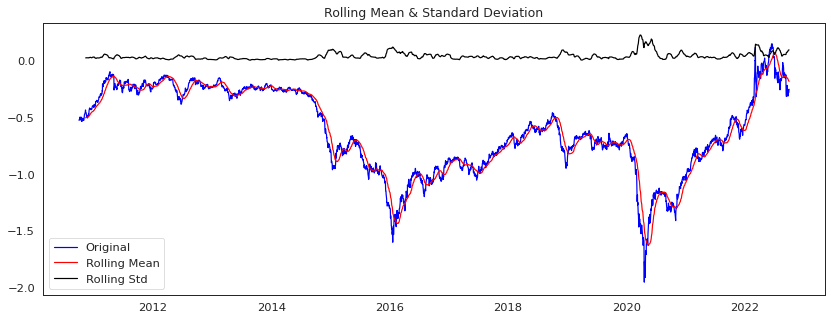

<Results of Dickey-Fuller Test>
Test Statistic                  -1.8571
p-value                          0.3525
#Lags Used                      22.0000
Number of Observations Used   2983.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(d_log)

In [ ]:
#transform to stationary
d_log_diff = d_log.diff(periods=1)
d_log_diff

Date
2010-10-01       NaN
2010-10-04    0.0036
2010-10-05    0.0020
2010-10-06    0.0147
2010-10-07    0.0060
               ...  
2022-09-27   -0.0004
2022-09-28    0.0136
2022-09-29    0.0435
2022-09-30   -0.0289
2022-10-03    0.0311
Name: Diesel, Length: 3006, dtype: float64

In [ ]:
d_log_diff.dropna(inplace=True)

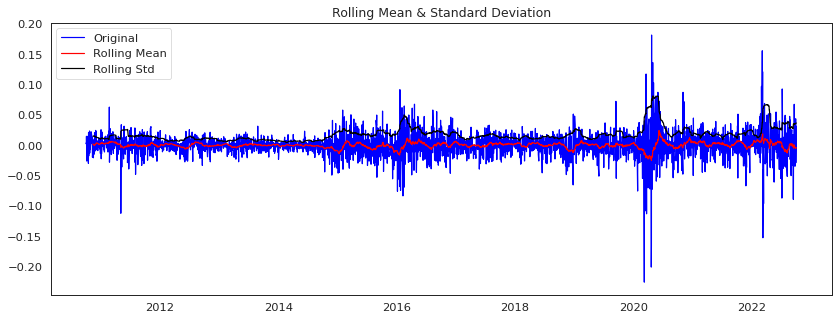

<Results of Dickey-Fuller Test>
Test Statistic                 -10.3895
p-value                          0.0000
#Lags Used                      21.0000
Number of Observations Used   2983.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(d_log_diff)

In [ ]:
len(d_log_diff)

3005

In [ ]:
# train_size = int(len(d_log_diff) * 0.80)
train_size = 2905

In [ ]:
train = d_log_diff[:train_size]
test = d_log_diff[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2905
Test shape: 100


In [ ]:
print(train.head(3), print(test.head(3)))

Date
2022-05-12   -0.0305
2022-05-13    0.0272
2022-05-17   -0.0281
Name: Diesel, dtype: float64
Date
2010-10-04   0.0036
2010-10-05   0.0020
2010-10-06   0.0147
Name: Diesel, dtype: float64 None


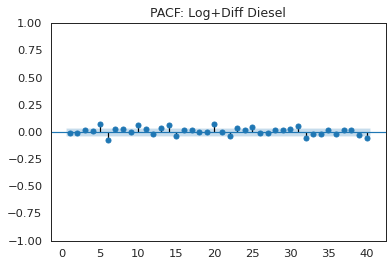

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

title = 'PACF: Log+Diff Diesel'
lags = 40
plot_pacf(train, title=title, lags=lags, zero=False, method=("ols"));

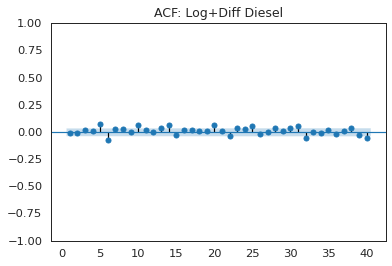

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

title = 'ACF: Log+Diff Diesel'
lags = 40
plot_acf(train, title=title, lags=lags, zero=False);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fitting a simple ARIMA(1,1,1) model
model = ARIMA(train, order=(1,1,1))
model_result = model.fit()
model_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Diesel   No. Observations:                 2905
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7108.717
Date:                Thu, 15 Dec 2022   AIC                         -14211.435
Time:                        13:25:28   BIC                         -14193.513
Sample:                             0   HQIC                        -14204.978
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0149      0.007     -2.128      0.033      -0.029      -0.001
ma.L1         -0.9967      0.001  -1020.017      0.000      -0.999      -0.995
sigma2         0.0004   3.75e-06    116.421      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             34532.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.20   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima111_preds = model_result.predict(start=start, end=end, dynamic=False).rename('ARIMA111 Predictions')
arima111_mse = mean_squared_error(test, arima111_preds)
print("ARIMA(1,1,1) MSE: " + str(arima111_mse))
print("ARIMA(1,1,1) RMSE: " + str(np.sqrt(arima111_mse)))

ARIMA(1,1,1) MSE: 0.0011148635778188433
ARIMA(1,1,1) RMSE: 0.03338957289063224


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# use auto_arima to automate ARIMA model selection

from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(
    train,
    exogenous=None,     # don't use exogenous variables
    m=1,                # don't add seasonal cycles as I'm interested only in an ARIMA model
    max_order=None,     # don't limit total number of non-seasonal AR and MA components
    max_p=15,           # use maximum of 15 lags for AR and MA components as implied by the ACF plot of the ARIMA(1,1,1) residuals
    max_q=15,
    max_d=2,            # use max integration of 2 to reach stationarity
    maxiter=100,
    alpha=0.05,         # use 0.05 level of significance
    njobs=-1,           # fit as many as possible models
    trend="ct",
    start_P=0,          # don't use seasonal components as I'm interested only in an ARIMA model
    start_Q=0,
    start_D=0,
    max_P=0,
    max_Q=0,
    max_D=0)

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2905
Model:                        SARIMAX   Log Likelihood                7115.322
Date:                Thu, 15 Dec 2022   AIC                         -14224.644
Time:                        13:25:36   BIC                         -14206.721
Sample:                             0   HQIC                        -14218.186
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.539      0.590      -0.003       0.002
drift       5.083e-07   5.06e-07      1.005      0.315   -4.83e-07     1.5e-06
sigma2         0.0004   3.78e-06    115.543      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):             34627.34
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               6.18   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_auto = ARIMA(train, order=(3,0,7))
model_auto_result = model_auto.fit()
model_auto_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Diesel   No. Observations:                 2905
Model:                 ARIMA(3, 0, 7)   Log Likelihood                7142.161
Date:                Thu, 15 Dec 2022   AIC                         -14260.323
Time:                        13:25:43   BIC                         -14188.633
Sample:                             0   HQIC                        -14234.494
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.359      0.720      -0.001       0.001
ar.L1          0.0956      0.132      0.726      0.468      -0.163       0.354
ar.L2          0.0398      0.124      0.321      0.748      -0.203       0.282
ar.L3          0.4487      0.094      4.755      0.000       0.264       0.634
ma.L1         -0.1009      0.133     -0.760      0.447      -0.361       0.159
ma.L2         -0.0460      0.123     -0.374      0.708      -0.287       0.195
ma.L3         -0.4441      0.094     -4.719      0.000      -0.629      -0.260
ma.L4          0.0150      0.009      1.590      0.112      -0.003       0.033
ma.L5          0.0823      0.010      8.196      0.000       0.063       0.102
ma.L6         -0.0930      0.019     -4.933      0.000      -0.130      -0.056
ma.L7          0.0548      0.017      3.278      0.001       0.022       0.088
sigma2         0.0004   4.17e-06    102.813      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             31665.24
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.86   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima307_preds = model_auto_result.predict(start=start, end=end, dynamic=False).rename('ARIMA307 Predictions')
arima307_mse = mean_squared_error(test, arima307_preds)
print("ARIMA(1,1,1) MSE: " + str(arima307_mse))
print("ARIMA(1,1,1) RMSE: " + str(np.sqrt(arima307_mse)))

ARIMA(1,1,1) MSE: 0.0011124711645614386
ARIMA(1,1,1) RMSE: 0.03335372789601544


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
arima307_preds.head()

2905    0.0000
2906   -0.0003
2907    0.0011
2908   -0.0026
2909    0.0047
Name: ARIMA307 Predictions, dtype: float64

In [ ]:
arima111_preds.head()

2905   0.0019
2906   0.0022
2907   0.0022
2908   0.0022
2909   0.0022
Name: ARIMA111 Predictions, dtype: float64

In [ ]:
#return the predicted values to reverse diff and reverse log to match the original dataset
arima307_r_diff = inv_diff(gas_log[train_size:], arima307_preds, 1)  
arima307_r_diff


array([-0.19042552, -0.19071921, -0.18963302, -0.19225914, -0.18753291,
       -0.19129478, -0.19125672, -0.18921376, -0.19063686, -0.19060649,
       -0.18967532, -0.19015555, -0.19008269, -0.18960886, -0.18970804,
       -0.18959787, -0.18931054, -0.18925508, -0.1891208 , -0.18890871,
       -0.18879009, -0.18864194, -0.18845977, -0.18831512, -0.18815946,
       -0.18798897, -0.18783345, -0.18767384, -0.18750777, -0.18734765,
       -0.187186  , -0.18702154, -0.18685943, -0.18669673, -0.18653282,
       -0.18636982, -0.1862066 , -0.18604285, -0.18587944, -0.18571595,
       -0.18555223, -0.18538863, -0.185225  , -0.18506127, -0.18489759,
       -0.18473389, -0.18457014, -0.18440641, -0.18424267, -0.18407892,
       -0.18391516, -0.18375141, -0.18358764, -0.18342388, -0.18326011,
       -0.18309634, -0.18293257, -0.1827688 , -0.18260503, -0.18244126,
       -0.18227748, -0.18211371, -0.18194993, -0.18178616, -0.18162238,
       -0.1814586 , -0.18129483, -0.18113105, -0.18096728, -0.18

In [ ]:
arima307_r_diff_exp = np.exp(arima307_r_diff)
arima307_r_diff_exp

array([0.82660732, 0.82636459, 0.82726267, 0.82509303, 0.82900184,
       0.8258891 , 0.82592053, 0.82760958, 0.82643264, 0.82645775,
       0.82722768, 0.82683051, 0.82689076, 0.82728265, 0.82720061,
       0.82729175, 0.82752948, 0.82757538, 0.82768652, 0.82786208,
       0.82796029, 0.82808296, 0.82823382, 0.82835363, 0.82848259,
       0.82862385, 0.82875272, 0.82888502, 0.82902268, 0.82915543,
       0.82928948, 0.82942587, 0.82956034, 0.82969532, 0.82983132,
       0.8299666 , 0.83010208, 0.83023802, 0.8303737 , 0.83050947,
       0.83064545, 0.83078135, 0.8309173 , 0.83105336, 0.8311894 ,
       0.83132548, 0.83146162, 0.83159776, 0.83173394, 0.83187015,
       0.83200638, 0.83214264, 0.83227893, 0.83241524, 0.83255157,
       0.83268793, 0.83282431, 0.83296071, 0.83309714, 0.83323359,
       0.83337006, 0.83350656, 0.83364308, 0.83377962, 0.83391618,
       0.83405277, 0.83418938, 0.83432601, 0.83446267, 0.83459934,
       0.83473604, 0.83487276, 0.83500951, 0.83514627, 0.83528

In [ ]:
len(arima307_r_diff_exp)

100

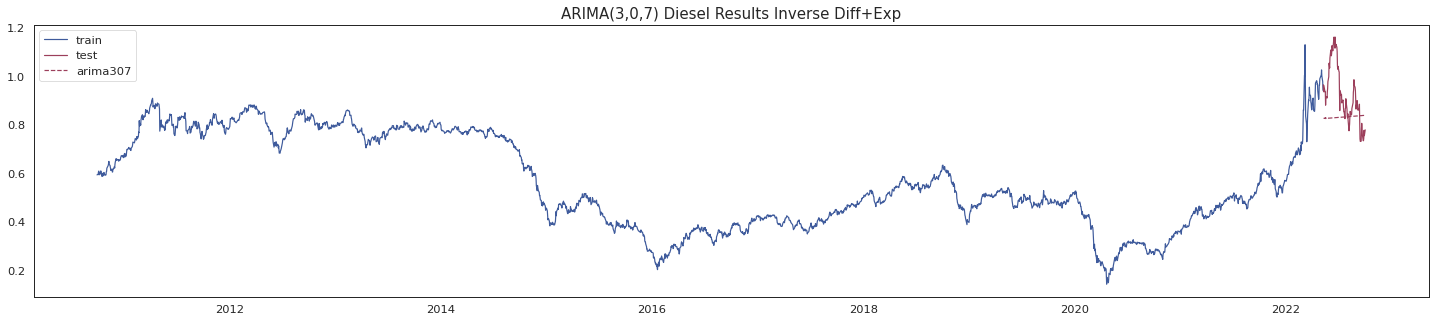

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Diesel'][:train_size], label='train', color='#3f5b9c')
plt.plot(df['Diesel'][train_size:], label='test', color='#9c3f5b')
plt.plot(diesel.index[-100:], arima307_r_diff_exp, label='arima307', color='#9c3f5b', linestyle='--')
plt.title('ARIMA(3,0,7) Diesel Results Inverse Diff+Exp', size=15)
plt.legend()
plt.show()

In [ ]:
arima_diesel = arima307_r_diff_exp
len(arima_diesel)

100

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test, arima_diesel))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test, arima_diesel)))
print('Test R2 Score: ', r2_score(test, arima_diesel))

Test Mean Absolute Error: 0.8341935527031358
Test Root Mean Squared Error: 0.9133419692005486
Test R2 Score:  -634.7242488080614


### Jet Fuel ARIMA

In [ ]:
jet.head()

Jet Fuel  diff_1  r_diff
Date                                
2010-10-01    0.5837     NaN  0.5837
2010-10-04    0.5876  0.0039  0.5876
2010-10-05    0.5891  0.0015  0.5891
2010-10-06    0.5986  0.0095  0.5986
2010-10-07    0.6026  0.0040  0.6026

In [ ]:
jet = jet['Jet Fuel']
jet.head()

Date
2010-10-01   0.5837
2010-10-04   0.5876
2010-10-05   0.5891
2010-10-06   0.5986
2010-10-07   0.6026
Name: Jet Fuel, dtype: float64

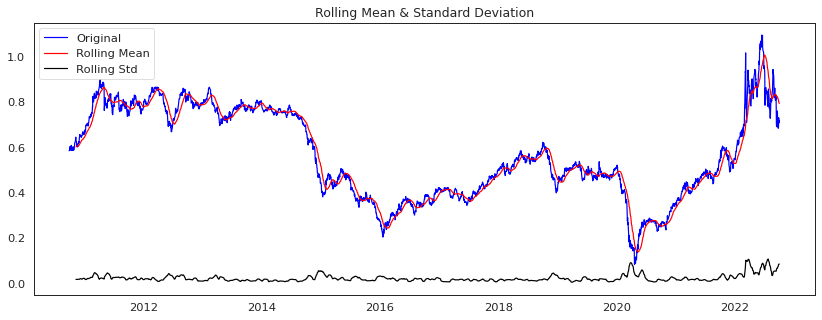

<Results of Dickey-Fuller Test>
Test Statistic                  -1.5746
p-value                          0.4963
#Lags Used                      23.0000
Number of Observations Used   2982.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(jet)

In [ ]:
#log transform
j_log = np.log(jet)
j_log.head()

Date
2010-10-01   -0.5384
2010-10-04   -0.5317
2010-10-05   -0.5292
2010-10-06   -0.5132
2010-10-07   -0.5066
Name: Jet Fuel, dtype: float64

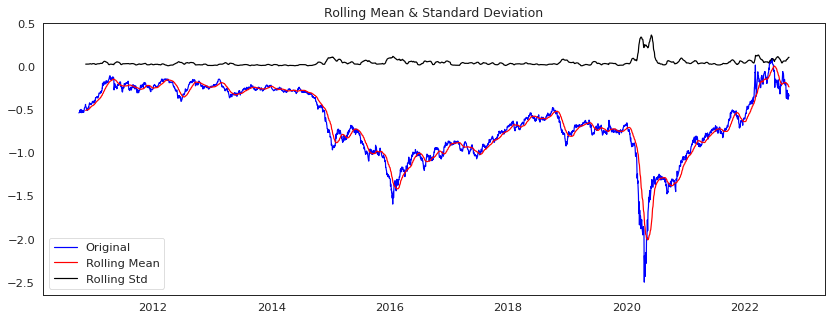

<Results of Dickey-Fuller Test>
Test Statistic                  -2.2298
p-value                          0.1956
#Lags Used                      23.0000
Number of Observations Used   2982.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(j_log)

In [ ]:
#transform to stationary
j_log_diff = j_log.diff(periods=1)
j_log_diff

Date
2010-10-01       NaN
2010-10-04    0.0067
2010-10-05    0.0026
2010-10-06    0.0160
2010-10-07    0.0066
               ...  
2022-09-27   -0.0004
2022-09-28    0.0094
2022-09-29    0.0565
2022-09-30   -0.0319
2022-10-03    0.0158
Name: Jet Fuel, Length: 3006, dtype: float64

In [ ]:
j_log_diff.dropna(inplace=True)

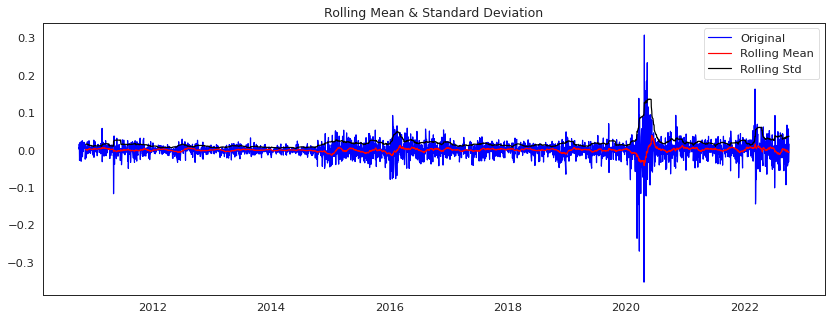

<Results of Dickey-Fuller Test>
Test Statistic                 -10.0169
p-value                          0.0000
#Lags Used                      22.0000
Number of Observations Used   2982.0000
Critical Value (1%)             -3.4325
Critical Value (5%)             -2.8625
Critical Value (10%)            -2.5673
dtype: float64


In [ ]:
test_stationarity(j_log_diff)

In [ ]:
len(j_log_diff)

3005

In [ ]:
# train_size = int(len(d_log_diff) * 0.80)
train_size = 2905

In [ ]:
train = j_log_diff[:train_size]
test = j_log_diff[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2905
Test shape: 100


In [ ]:
print(train.head(3), print(test.head(3)))

Date
2022-05-12   -0.0424
2022-05-13    0.0250
2022-05-17   -0.0234
Name: Jet Fuel, dtype: float64
Date
2010-10-04   0.0067
2010-10-05   0.0026
2010-10-06   0.0160
Name: Jet Fuel, dtype: float64 None


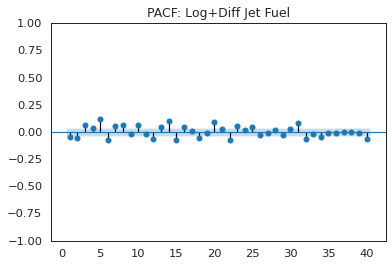

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

title = 'PACF: Log+Diff Jet Fuel'
lags = 40
plot_pacf(train, title=title, lags=lags, zero=False, method=("ols"));

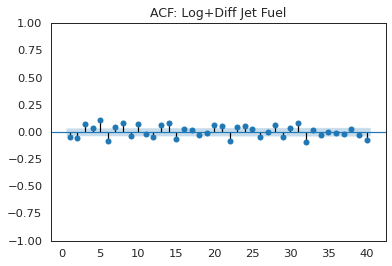

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

title = 'ACF: Log+Diff Jet Fuel'
lags = 40
plot_acf(train, title=title, lags=lags, zero=False);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fitting a simple ARIMA(1,1,1) model
model = ARIMA(train, order=(1,1,1))
model_result = model.fit()
model_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Jet Fuel   No. Observations:                 2905
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6621.889
Date:                Thu, 15 Dec 2022   AIC                         -13237.778
Time:                        13:25:48   BIC                         -13219.856
Sample:                             0   HQIC                        -13231.321
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0466      0.005    -10.092      0.000      -0.056      -0.038
ma.L1         -0.9993      0.001   -961.974      0.000      -1.001      -0.997
sigma2         0.0006   3.45e-06    176.893      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            204735.90
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               9.79   Skew:                            -1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima111_preds = model_result.predict(start=start, end=end, dynamic=False).rename('ARIMA111 Predictions')
arima111_mse = mean_squared_error(test, arima111_preds)
print("ARIMA(1,1,1) MSE: " + str(arima111_mse))
print("ARIMA(1,1,1) RMSE: " + str(np.sqrt(arima111_mse)))

ARIMA(1,1,1) MSE: 0.0011740792774514806
ARIMA(1,1,1) RMSE: 0.034264840251363796


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# use auto_arima to automate ARIMA model selection

from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(
    train,
    exogenous=None,     # don't use exogenous variables
    m=1,                # don't add seasonal cycles as I'm interested only in an ARIMA model
    max_order=None,     # don't limit total number of non-seasonal AR and MA components
    max_p=15,           # use maximum of 15 lags for AR and MA components as implied by the ACF plot of the ARIMA(1,1,1) residuals
    max_q=15,
    max_d=2,            # use max integration of 2 to reach stationarity
    maxiter=100,
    alpha=0.05,         # use 0.05 level of significance
    njobs=-1,           # fit as many as possible models
    trend="ct",
    start_P=0,          # don't use seasonal components as I'm interested only in an ARIMA model
    start_Q=0,
    start_D=0,
    max_P=0,
    max_Q=0,
    max_D=0)

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2905
Model:               SARIMAX(0, 0, 3)   Log Likelihood                6644.198
Date:                Thu, 15 Dec 2022   AIC                         -13276.397
Time:                        13:26:27   BIC                         -13240.552
Sample:                             0   HQIC                        -13263.482
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.441      0.659      -0.003       0.002
drift       5.206e-07   6.55e-07      0.795      0.427   -7.63e-07     1.8e-06
ma.L1         -0.0395      0.005     -8.663      0.000      -0.048      -0.031
ma.L2         -0.0594      0.006    -10.783      0.000      -0.070      -0.049
ma.L3          0.0734      0.007     10.529      0.000       0.060       0.087
sigma2         0.0006   3.76e-06    161.235      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):            196123.80
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               9.39   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_auto = ARIMA(train, order=(0,0,3))
model_auto_result = model_auto.fit()
model_auto_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Jet Fuel   No. Observations:                 2905
Model:                 ARIMA(0, 0, 3)   Log Likelihood                6644.888
Date:                Thu, 15 Dec 2022   AIC                         -13279.775
Time:                        13:26:31   BIC                         -13249.905
Sample:                             0   HQIC                        -13269.013
                               - 2905                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.302      0.762      -0.001       0.001
ma.L1         -0.0512      0.005    -11.358      0.000      -0.060      -0.042
ma.L2         -0.0682      0.006    -12.201      0.000      -0.079      -0.057
ma.L3          0.1005      0.007     14.275      0.000       0.087       0.114
sigma2         0.0006   3.71e-06    162.587      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            192835.09
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               9.31   Skew:                            -1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# evaluate model MSE and RMSE
start = len(train)
end = len(train) + len(test) - 1
arima003_preds = model_auto_result.predict(start=start, end=end, dynamic=False).rename('ARIMA003 Predictions')
arima003_mse = mean_squared_error(test, arima003_preds)
print("ARIMA(0,0,3) MSE: " + str(arima003_mse))
print("ARIMA(0,0,3) RMSE: " + str(np.sqrt(arima003_mse)))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA(0,0,3) MSE: 0.0011767415039475274
ARIMA(0,0,3) RMSE: 0.03430366604238572


In [ ]:
arima003_preds.head()

2905    0.0034
2906   -0.0046
2907    0.0003
2908    0.0001
2909    0.0001
Name: ARIMA003 Predictions, dtype: float64

In [ ]:
arima111_preds.head()

2905   0.0006
2906   0.0007
2907   0.0007
2908   0.0007
2909   0.0007
Name: ARIMA111 Predictions, dtype: float64

In [ ]:
#return the predicted values to reverse diff and reverse log to match the original dataset
arima003_r_diff = inv_diff(j_log[train_size:], arima003_preds, 1)  
arima003_r_diff


array([-0.10430228, -0.10888093, -0.10857004, -0.10842543, -0.10828082,
       -0.10813622, -0.10799161, -0.10784701, -0.1077024 , -0.1075578 ,
       -0.10741319, -0.10726859, -0.10712398, -0.10697937, -0.10683477,
       -0.10669016, -0.10654556, -0.10640095, -0.10625635, -0.10611174,
       -0.10596714, -0.10582253, -0.10567792, -0.10553332, -0.10538871,
       -0.10524411, -0.1050995 , -0.1049549 , -0.10481029, -0.10466569,
       -0.10452108, -0.10437647, -0.10423187, -0.10408726, -0.10394266,
       -0.10379805, -0.10365345, -0.10350884, -0.10336424, -0.10321963,
       -0.10307502, -0.10293042, -0.10278581, -0.10264121, -0.1024966 ,
       -0.102352  , -0.10220739, -0.10206279, -0.10191818, -0.10177357,
       -0.10162897, -0.10148436, -0.10133976, -0.10119515, -0.10105055,
       -0.10090594, -0.10076133, -0.10061673, -0.10047212, -0.10032752,
       -0.10018291, -0.10003831, -0.0998937 , -0.0997491 , -0.09960449,
       -0.09945988, -0.09931528, -0.09917067, -0.09902607, -0.09

In [ ]:
arima003_r_diff_exp = np.exp(arima003_r_diff)
arima003_r_diff_exp

array([0.90095292, 0.8968372 , 0.89711606, 0.8972458 , 0.89737556,
       0.89750533, 0.89763512, 0.89776494, 0.89789477, 0.89802462,
       0.89815449, 0.89828437, 0.89841428, 0.89854421, 0.89867415,
       0.89880411, 0.89893409, 0.89906409, 0.89919411, 0.89932415,
       0.89945421, 0.89958428, 0.89971438, 0.89984449, 0.89997462,
       0.90010477, 0.90023494, 0.90036513, 0.90049534, 0.90062556,
       0.90075581, 0.90088607, 0.90101636, 0.90114666, 0.90127698,
       0.90140732, 0.90153767, 0.90166805, 0.90179845, 0.90192886,
       0.90205929, 0.90218975, 0.90232022, 0.90245071, 0.90258122,
       0.90271174, 0.90284229, 0.90297286, 0.90310344, 0.90323404,
       0.90336467, 0.90349531, 0.90362597, 0.90375665, 0.90388734,
       0.90401806, 0.9041488 , 0.90427955, 0.90441032, 0.90454112,
       0.90467193, 0.90480276, 0.90493361, 0.90506447, 0.90519536,
       0.90532627, 0.90545719, 0.90558813, 0.9057191 , 0.90585008,
       0.90598108, 0.9061121 , 0.90624314, 0.90637419, 0.90650

In [ ]:
len(arima003_r_diff_exp)

100

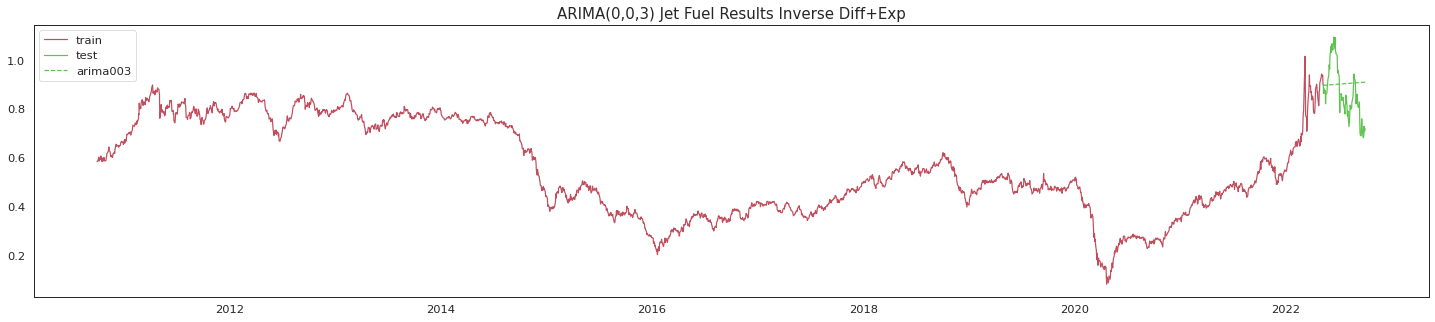

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Jet Fuel'][:train_size], label='train', color='#c24e5d')
plt.plot(df['Jet Fuel'][train_size:], label='test', color='#5dc24e')
plt.plot(jet.index[-100:], arima003_r_diff_exp, label='arima003', color='#5dc24e', linestyle='--')
plt.title('ARIMA(0,0,3) Jet Fuel Results Inverse Diff+Exp', size=15)
plt.legend()
plt.show()

In [ ]:
arima_jet = arima003_r_diff_exp
len(arima_jet)

100

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test, arima_jet))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test, arima_jet)))
print('Test R2 Score: ', r2_score(test, arima_jet))

Test Mean Absolute Error: 0.9056194039383874
Test Root Mean Squared Error: 0.951640375319578
Test R2 Score:  -703.8153095248739


# Part 8: FB Prophet

### Gasoline Prophet

In [ ]:
# !pip install fbprophet

In [ ]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet

In [ ]:
df.reset_index(inplace=True)
df.head()

Date  Diesel  Gasoline  Jet Fuel  year  quarter  month  day  weekday
0 2010-10-01  0.5928    0.5377    0.5837  2010        4     10    1        1
1 2010-10-04  0.5949    0.5416    0.5876  2010        4     10    4        1
2 2010-10-05  0.5961    0.5438    0.5891  2010        4     10    5        1
3 2010-10-06  0.6049    0.5512    0.5986  2010        4     10    6        1
4 2010-10-07  0.6085    0.5595    0.6026  2010        4     10    7        1

In [ ]:
# Renaming the column & index for Prophet compatability
gas_prop= df[['Date', 'Gasoline']]

In [ ]:
gas_prop.rename(columns = {'Date':'ds', 'Gasoline':'y'}, inplace = True)
gas_prop.head()

ds      y
0 2010-10-01 0.5377
1 2010-10-04 0.5416
2 2010-10-05 0.5438
3 2010-10-06 0.5512
4 2010-10-07 0.5595

In [ ]:
# train_size = int(len(gasoline1) * 0.80)
train_size = 2906

In [ ]:

train = gas_prop[:train_size]
test = gas_prop[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2906
Test shape: 100


In [ ]:
test.head()

ds      y
2906 2022-05-12 0.8346
2907 2022-05-13 0.8804
2908 2022-05-17 0.9203
2909 2022-05-18 0.9353
2910 2022-05-19 0.8906

In [ ]:
# fit model
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/xk9xjtts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/2vbg282y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54830', 'data', 'file=/tmp/tmpbmro2mcw/xk9xjtts.json', 'init=/tmp/tmpbmro2mcw/2vbg282y.json', 'output', 'file=/tmp/tmpbmro2mcw/prophet_modelwhvo2mre/prophet_model-20221215132633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# populate forecast
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds   yhat  yhat_lower  yhat_upper
95 2022-09-27 0.7305      0.6444      0.8189
96 2022-09-28 0.7308      0.6485      0.8216
97 2022-09-29 0.7327      0.6501      0.8138
98 2022-09-30 0.7337      0.6479      0.8124
99 2022-10-03 0.7329      0.6524      0.8168

In [ ]:
forecast.shape

(100, 19)

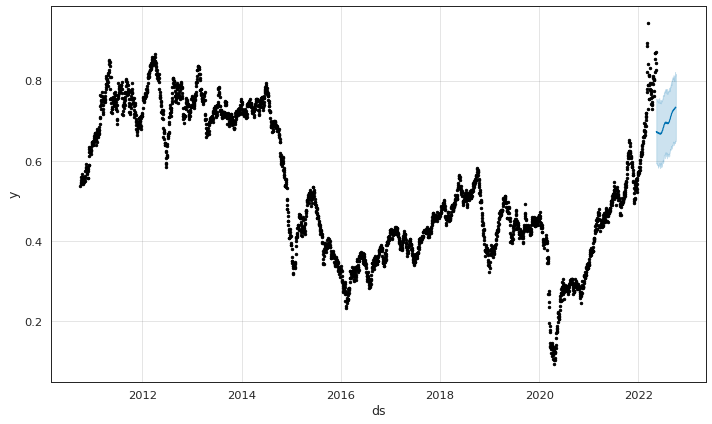

In [ ]:
# plot forecast
m.plot(forecast);

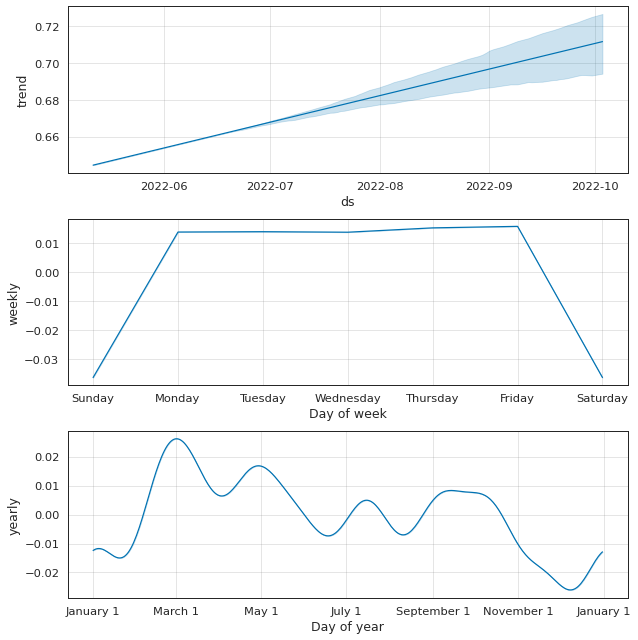

In [ ]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
m.plot_components(forecast);

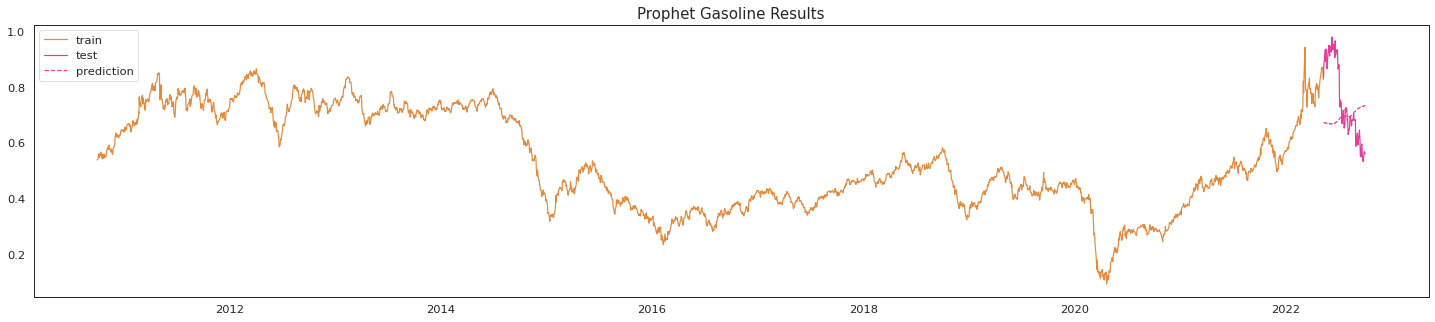

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Date'][:train_size],df['Gasoline'][:train_size], label='train', color='#e58a3d')
plt.plot(df['Date'][train_size:],df['Gasoline'][train_size:], label='test', color='#e53d98')
plt.plot(df['Date'][train_size:], forecast.yhat, label='prediction', color='#e53d98', linestyle='--')
plt.title('Prophet Gasoline Results', size=15)
plt.legend()
plt.show()

In [ ]:
gas_prophet = forecast.yhat
len(gas_prophet)

100

In [ ]:
test

ds      y
2906 2022-05-12 0.8346
2907 2022-05-13 0.8804
2908 2022-05-17 0.9203
2909 2022-05-18 0.9353
2910 2022-05-19 0.8906
...         ...    ...
3001 2022-09-27 0.5447
3002 2022-09-28 0.5535
3003 2022-09-29 0.5644
3004 2022-09-30 0.5678
3005 2022-10-03 0.5598

[100 rows x 2 columns]

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test.y, gas_prophet))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test.y, gas_prophet)))
print('Test R2 Score: ', r2_score(test.y, gas_prophet))

Test Mean Absolute Error: 0.13757697136767116
Test Root Mean Squared Error: 0.37091369800490137
Test R2 Score:  -0.498081229570422


### Diesel Prophet

In [ ]:
# !pip install fbprophet

In [ ]:
df.head()

Date  Diesel  Gasoline  Jet Fuel  year  quarter  month  day  weekday
0 2010-10-01  0.5928    0.5377    0.5837  2010        4     10    1        1
1 2010-10-04  0.5949    0.5416    0.5876  2010        4     10    4        1
2 2010-10-05  0.5961    0.5438    0.5891  2010        4     10    5        1
3 2010-10-06  0.6049    0.5512    0.5986  2010        4     10    6        1
4 2010-10-07  0.6085    0.5595    0.6026  2010        4     10    7        1

In [ ]:
# Renaming the column & index for Prophet compatability
die_prop= df[['Date', 'Diesel']]

In [ ]:
die_prop.rename(columns = {'Date':'ds', 'Diesel':'y'}, inplace = True)
die_prop.head()

ds      y
0 2010-10-01 0.5928
1 2010-10-04 0.5949
2 2010-10-05 0.5961
3 2010-10-06 0.6049
4 2010-10-07 0.6085

In [ ]:
# train_size = int(len(gasoline1) * 0.80)
train_size = 2906

In [ ]:

train = die_prop[:train_size]
test = die_prop[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2906
Test shape: 100


In [ ]:
test.head()

ds      y
2906 2022-05-12 0.9359
2907 2022-05-13 0.9618
2908 2022-05-17 0.9352
2909 2022-05-18 0.9357
2910 2022-05-19 0.8806

In [ ]:
# fit model
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/tq2pp3rt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/3aly_fih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55058', 'data', 'file=/tmp/tmpbmro2mcw/tq2pp3rt.json', 'init=/tmp/tmpbmro2mcw/3aly_fih.json', 'output', 'file=/tmp/tmpbmro2mcw/prophet_modelbap263v8/prophet_model-20221215132637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# populate forecast
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds   yhat  yhat_lower  yhat_upper
95 2022-09-27 0.7482      0.6609      0.8361
96 2022-09-28 0.7497      0.6588      0.8379
97 2022-09-29 0.7515      0.6643      0.8469
98 2022-09-30 0.7521      0.6652      0.8432
99 2022-10-03 0.7528      0.6606      0.8380

In [ ]:
forecast.shape

(100, 19)

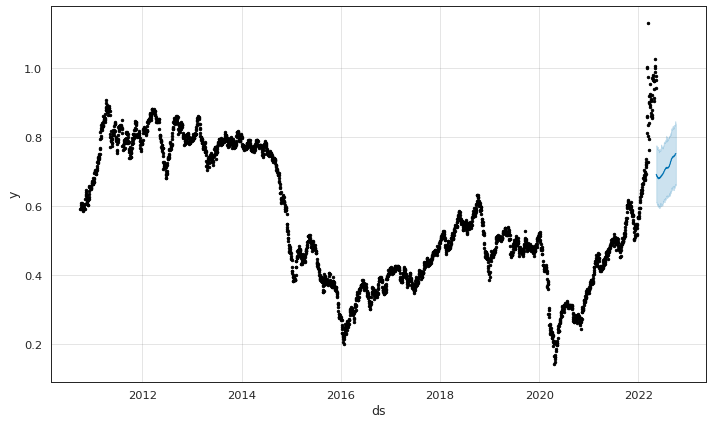

In [ ]:
# plot forecast
m.plot(forecast);

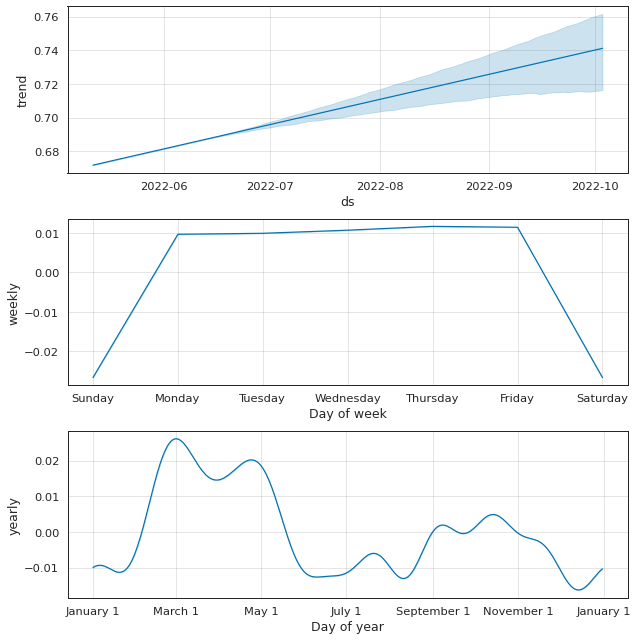

In [ ]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
m.plot_components(forecast);

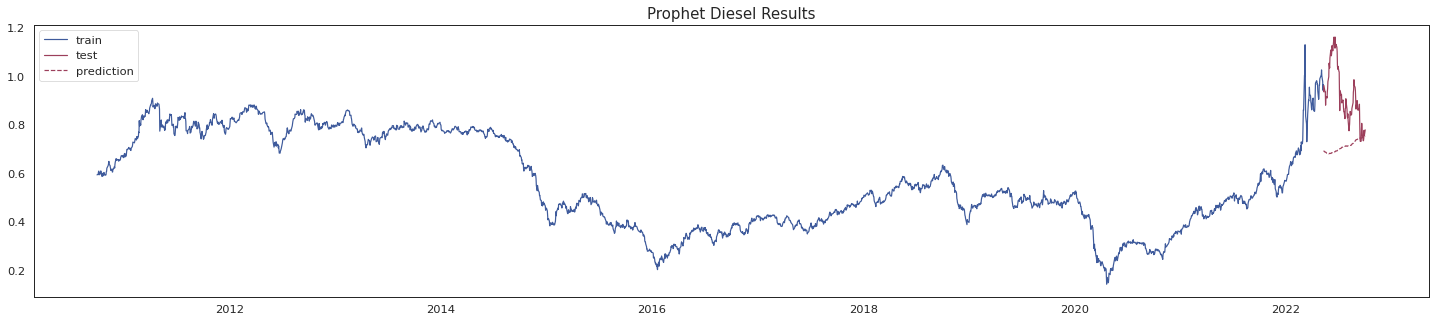

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Date'][:train_size],df['Diesel'][:train_size], label='train', color='#3f5b9c')
plt.plot(df['Date'][train_size:],df['Diesel'][train_size:], label='test', color='#9c3f5b')
plt.plot(df['Date'][train_size:], forecast.yhat, label='prediction', color='#9c3f5b', linestyle='--')
plt.title('Prophet Diesel Results', size=15)
plt.legend()
plt.show()

In [ ]:
diesel_prophet = forecast.yhat
len(diesel_prophet)

100

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test.y, diesel_prophet))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test.y, diesel_prophet)))
print('Test R2 Score: ', r2_score(test.y, diesel_prophet))

Test Mean Absolute Error: 0.21577873248121254
Test Root Mean Squared Error: 0.4645198946021715
Test R2 Score:  -3.6908934160514493


### Jet Fuel Prophet

In [ ]:
# !pip install fbprophet

In [ ]:
df.head()

Date  Diesel  Gasoline  Jet Fuel  year  quarter  month  day  weekday
0 2010-10-01  0.5928    0.5377    0.5837  2010        4     10    1        1
1 2010-10-04  0.5949    0.5416    0.5876  2010        4     10    4        1
2 2010-10-05  0.5961    0.5438    0.5891  2010        4     10    5        1
3 2010-10-06  0.6049    0.5512    0.5986  2010        4     10    6        1
4 2010-10-07  0.6085    0.5595    0.6026  2010        4     10    7        1

In [ ]:
# Renaming the column & index for Prophet compatability
jet_prop= df[['Date', 'Jet Fuel']]

In [ ]:
jet_prop.rename(columns = {'Date':'ds', 'Jet Fuel':'y'}, inplace = True)
jet_prop.head()

ds      y
0 2010-10-01 0.5837
1 2010-10-04 0.5876
2 2010-10-05 0.5891
3 2010-10-06 0.5986
4 2010-10-07 0.6026

In [ ]:
# train_size = int(len(gasoline1) * 0.80)
train_size = 2906

In [ ]:

train = jet_prop[:train_size]
test = jet_prop[train_size:]
print("Train shape: " + str(len(train)))
print("Test shape: " + str(len(test)))

Train shape: 2906
Test shape: 100


In [ ]:
test.head()

ds      y
2906 2022-05-12 0.8635
2907 2022-05-13 0.8854
2908 2022-05-17 0.8649
2909 2022-05-18 0.8757
2910 2022-05-19 0.8209

In [ ]:
# fit model
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/8jn1_zds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbmro2mcw/m0k63uj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8760', 'data', 'file=/tmp/tmpbmro2mcw/8jn1_zds.json', 'init=/tmp/tmpbmro2mcw/m0k63uj4.json', 'output', 'file=/tmp/tmpbmro2mcw/prophet_modeleazlcacu/prophet_model-20221215132642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# populate forecast
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds   yhat  yhat_lower  yhat_upper
95 2022-09-27 0.7224      0.6280      0.8089
96 2022-09-28 0.7238      0.6362      0.8106
97 2022-09-29 0.7257      0.6441      0.8141
98 2022-09-30 0.7266      0.6436      0.8082
99 2022-10-03 0.7277      0.6448      0.8114

In [ ]:
forecast.shape

(100, 19)

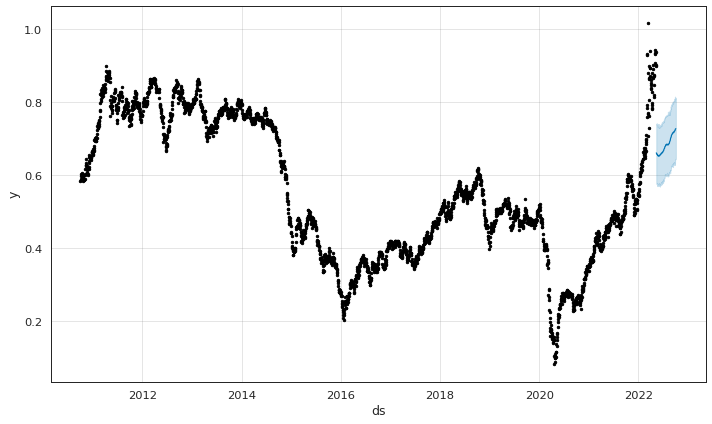

In [ ]:
# plot forecast
m.plot(forecast);

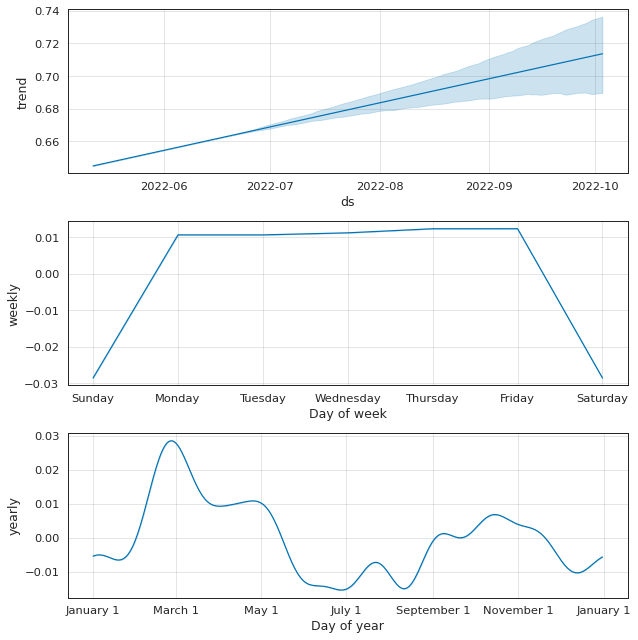

In [ ]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
m.plot_components(forecast);

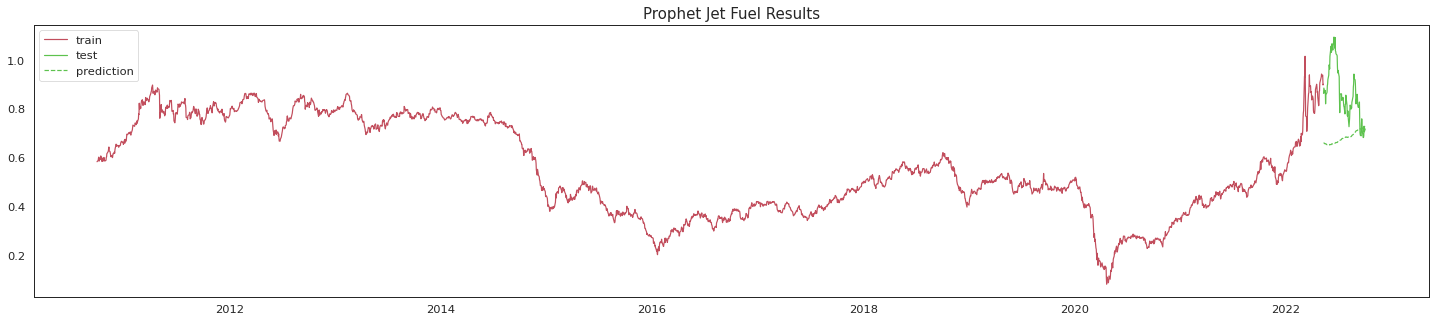

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['Date'][:train_size],df['Jet Fuel'][:train_size], label='train', color='#c24e5d')
plt.plot(df['Date'][train_size:],df['Jet Fuel'][train_size:], label='test', color='#5dc24e')
plt.plot(df['Date'][train_size:], forecast.yhat, label='prediction', color='#5dc24e', linestyle='--')
plt.title('Prophet Jet Fuel Results', size=15)
plt.legend()
plt.show()

In [ ]:
jet_prophet = forecast.yhat
len(jet_prophet)

100

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(test.y, jet_prophet))
print('Test Root Mean Squared Error:',np.sqrt(mean_absolute_error(test.y, jet_prophet)))
print('Test R2 Score: ', r2_score(test.y, jet_prophet))

Test Mean Absolute Error: 0.19120676083090044
Test Root Mean Squared Error: 0.43727195294336046
Test R2 Score:  -3.3389751913542174


# Part 9: Overall Plot Comparison

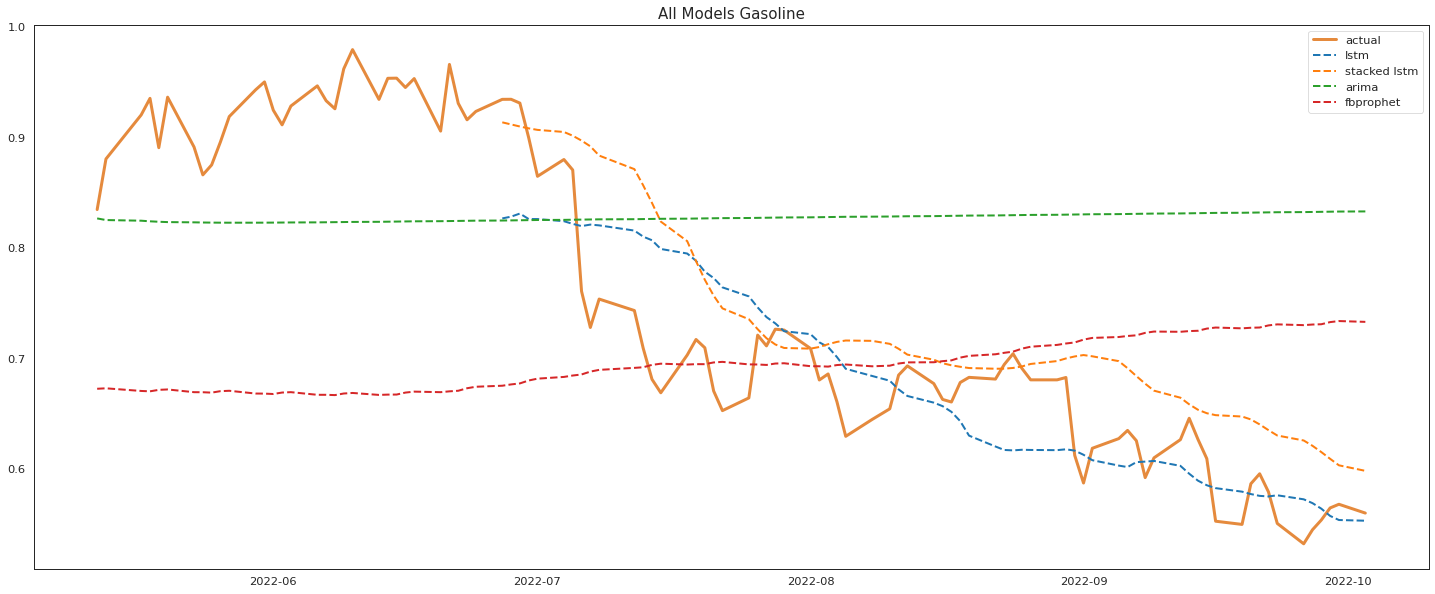

In [ ]:
plt.figure(figsize=(25,10))
# plt.plot(df['Date'][:train_size],df['Gasoline'][:train_size], label='train', color='#e58a3d')
plt.plot(df['Date'][train_size:],df['Gasoline'][train_size:], label='actual', color='#e58a3d', linewidth=3)
plt.plot(df['Date'][-69:], lstm_gas, label='lstm', linestyle='--', linewidth=2)
plt.plot(df['Date'][-69:], stlstm_gas, label='stacked lstm', linestyle='--', linewidth=2)
plt.plot(df['Date'][-100:], arima_gas, label='arima', linestyle='--', linewidth=2)
plt.plot(df['Date'][-100:], gas_prophet, label='fbprophet', linestyle='--', linewidth=2)
plt.title('All Models Gasoline', size=15)
plt.legend()
plt.show()

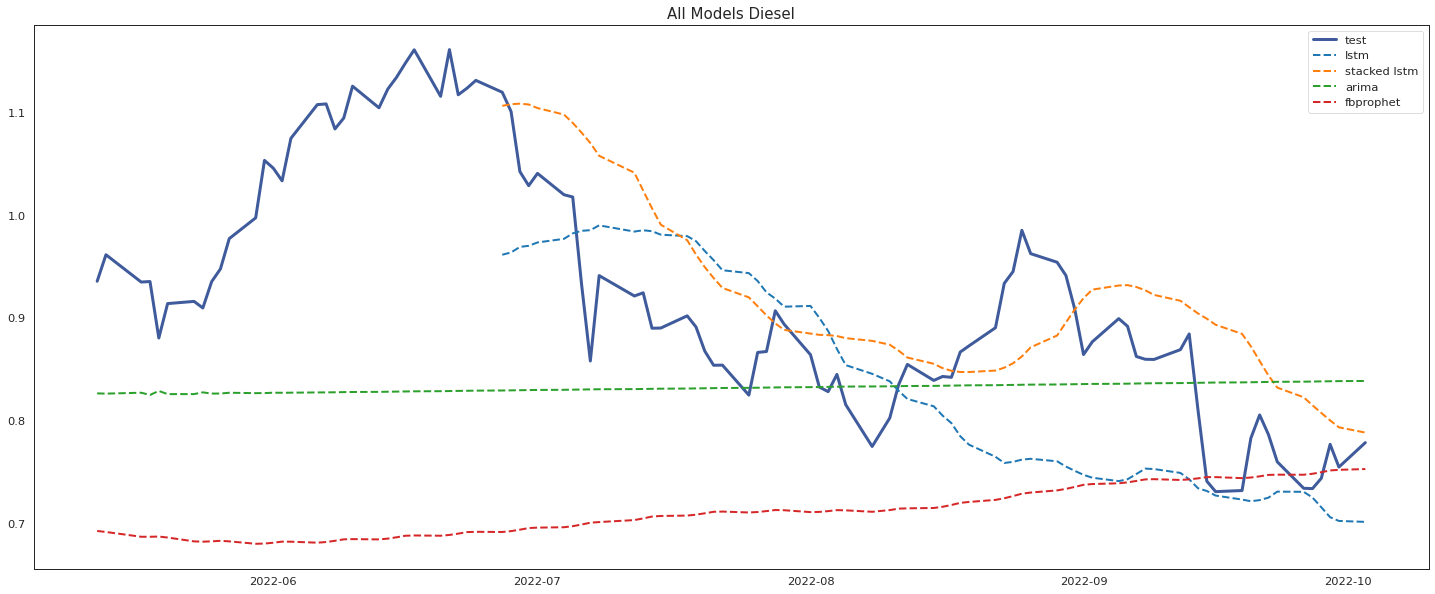

In [ ]:
plt.figure(figsize=(25,10))
# plt.plot(df['Date'][:train_size],df['Diesel'][:train_size], label='train', color='#3f5b9c')
plt.plot(df['Date'][train_size:],df['Diesel'][train_size:], label='test', color='#3f5b9c', linewidth=3)
plt.plot(df['Date'][-69:], lstm_diesel, label='lstm', linestyle='--', linewidth=2)
plt.plot(df['Date'][-69:], stlstm_diesel, label='stacked lstm', linestyle='--', linewidth=2) 
plt.plot(df['Date'][-100:], arima_diesel, label='arima', linestyle='--', linewidth=2) 
plt.plot(df['Date'][-100:], diesel_prophet, label='fbprophet', linestyle='--', linewidth=2) 
plt.title('All Models Diesel', size=15)
plt.legend()
plt.show()

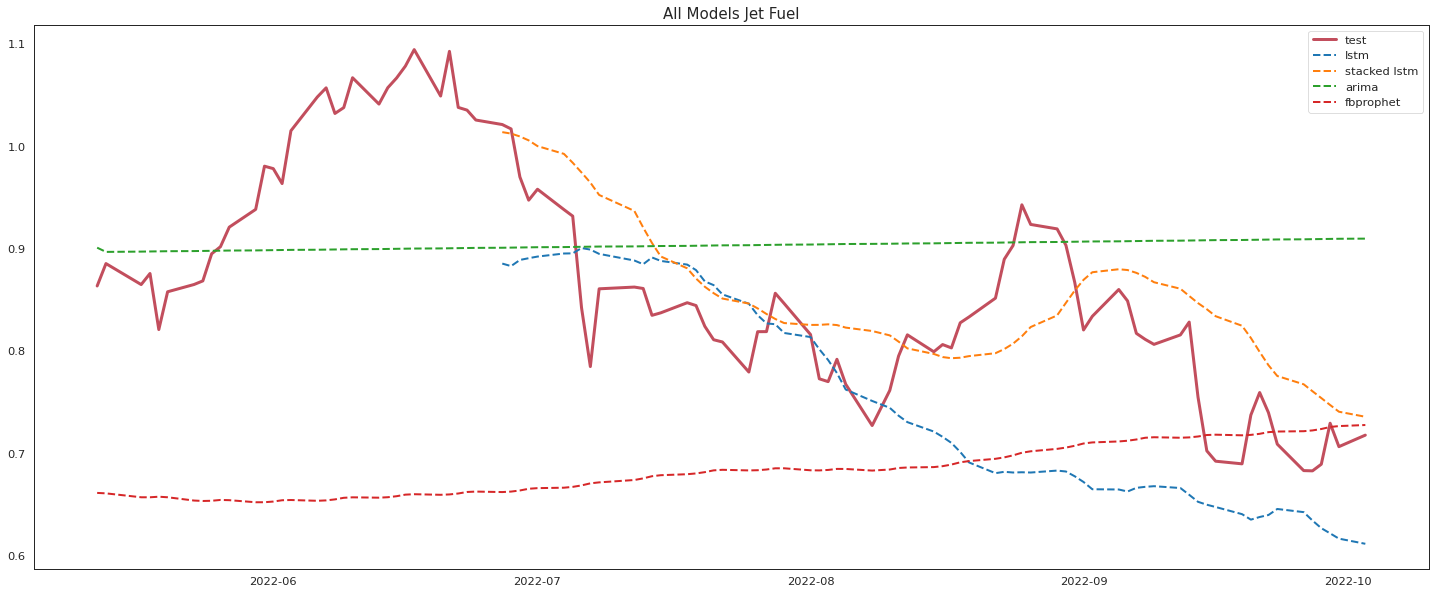

In [ ]:
plt.figure(figsize=(25,10))
# plt.plot(df['Date'][:train_size],df['Jet Fuel'][:train_size], label='train', color='#c24e5d')
plt.plot(df['Date'][train_size:],df['Jet Fuel'][train_size:], label='test', color='#c24e5d', linewidth=3)
plt.plot(df['Date'][-69:], lstm_jet, label='lstm', linestyle='--', linewidth=2)
plt.plot(df['Date'][-69:], stlstm_jet, label='stacked lstm', linestyle='--', linewidth=2) 
plt.plot(df['Date'][-100:], arima_jet, label='arima', linestyle='--', linewidth=2) 
plt.plot(df['Date'][-100:], jet_prophet, label='fbprophet', linestyle='--', linewidth=2)
plt.title('All Models Jet Fuel', size=15)
plt.legend()
plt.show()